In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
 df.columns=['Signal','Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

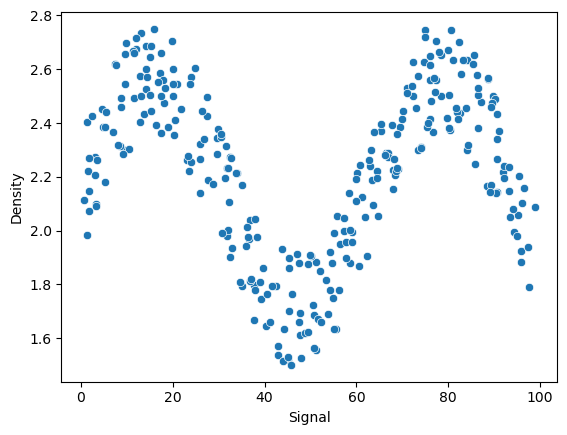

In [5]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [7]:
X = df['Signal']
y=df['Density']

In [8]:
# since we have feature to predict so we don't have to worry about
# normalizing dataset over here

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr_model = LinearRegression()

In [15]:
# lr_model.fit(X_train,y_train)
# will give error here because of single feature data set, in such cases 
# we have to reshape the values

In [20]:
X = df['Signal'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [21]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [22]:
lr_preds = lr_model.predict(X_test)

In [23]:
lr_preds
# these predictions values can be a great signal that something
# is wrong.

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [26]:
# MAE = 0.211 which is actually pretty reasonable because our range 
# is in between 1.6 to 2.8 and if mean value is 2.2 then our MAE is 
# around 10% of our mean which is not that bad.

In [31]:
np.sqrt(mean_squared_error(y_test,lr_preds))


0.2570051996584629

In [32]:
# it seems that our model is on an avg working fine.
# But prediction values give some signal, that something is wrong.
# so let us check for all signal ranges.

In [33]:
signal_range= np.arange(1,100)

In [34]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

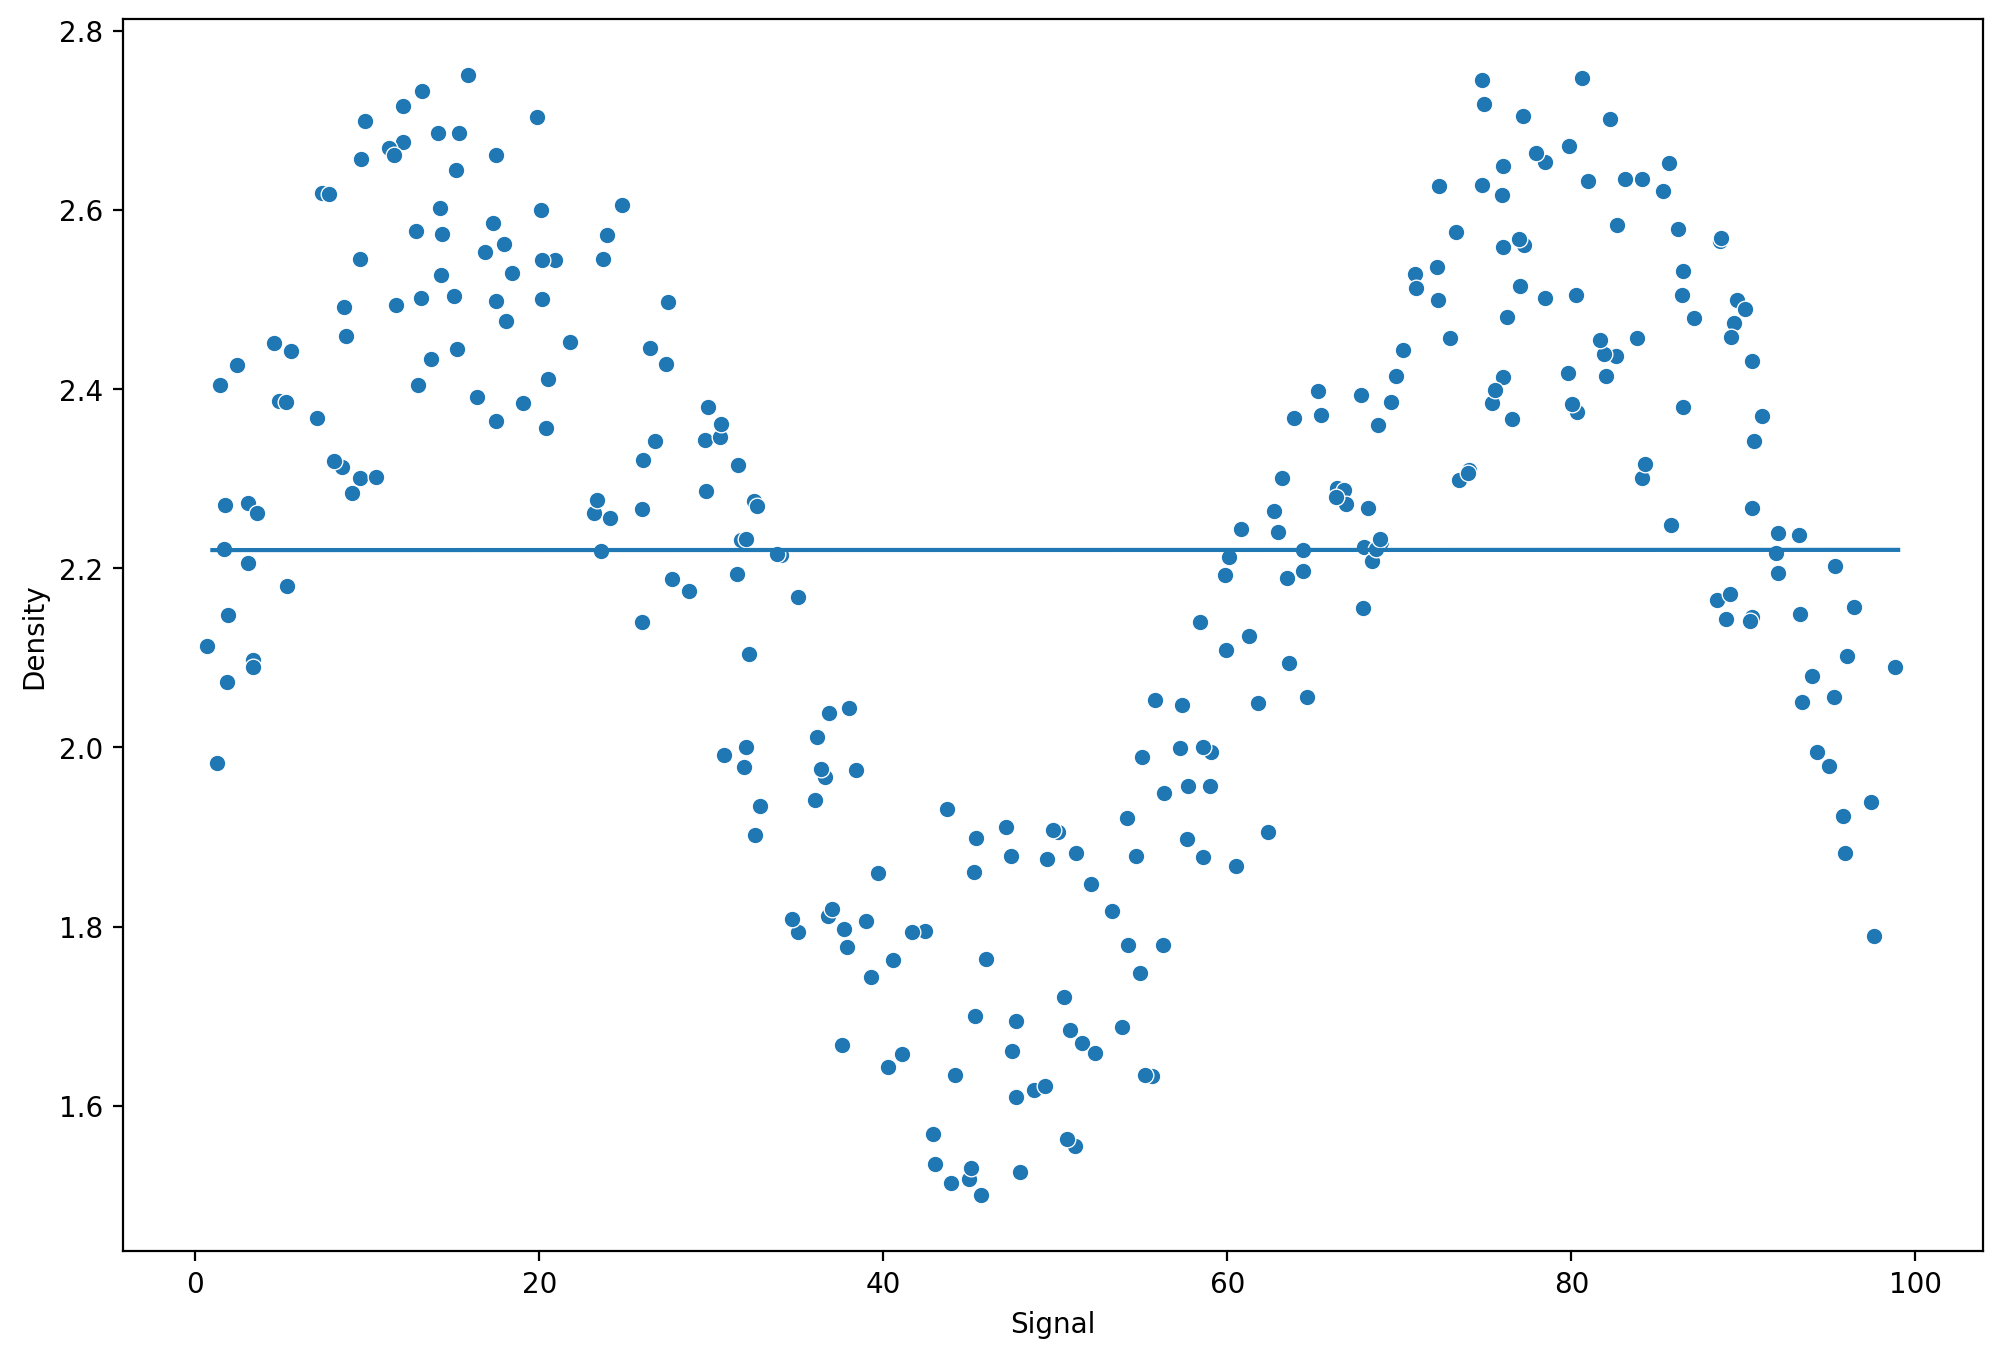

In [35]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

plt.plot(signal_range,signal_preds)

In [36]:
# this implies that our linear regression model cannot fit onto this data.
# Based on performance metrics it looks like that we were doing pretty well.
# That was because we were guessing an avg line only.

# now we will have a look at a polynomail regression and will see 
# whether we will be able to solve this problem or not.

In [42]:
def run_model(model,X_train,X_text,y_train, y_test):
    #Fit model training
    model.fit(X_train,y_train)
    
    #Get Metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    
    #Plot Results model Signal Range
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    
    plt.plot(signal_range,output)
    

RMSE: 0.2570051996584629
MAE: 0.211198973318633


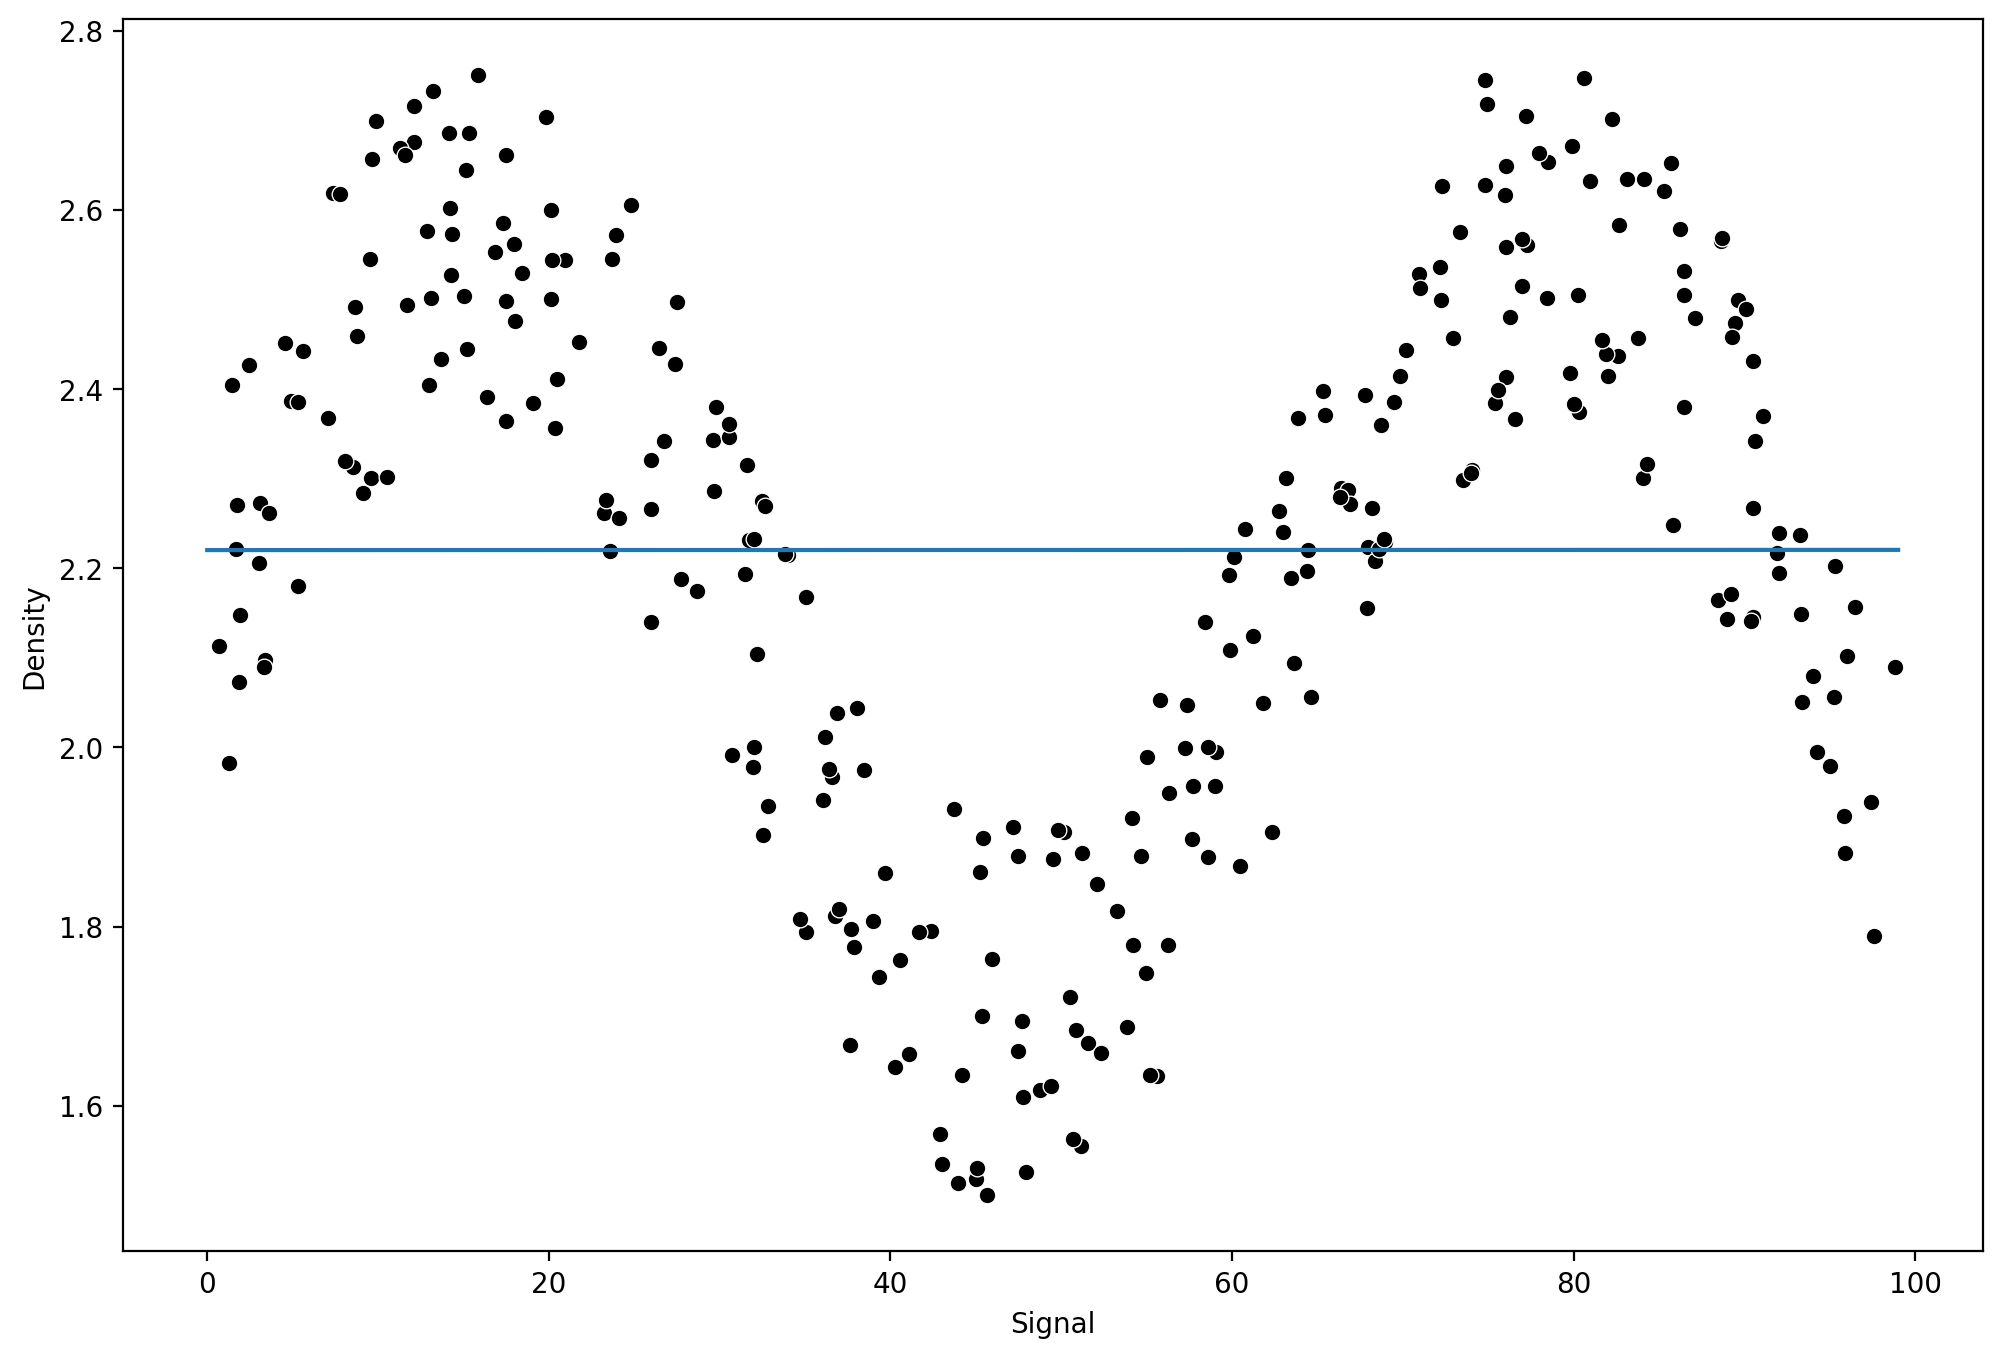

In [43]:
model = LinearRegression()
run_model(model,X_train,X_test,y_train,y_test)

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


In [52]:
# since polynomial regression first required to be converted to polynomial features
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

RMSE: 0.2817309563725583
MAE: 0.2290310544351128


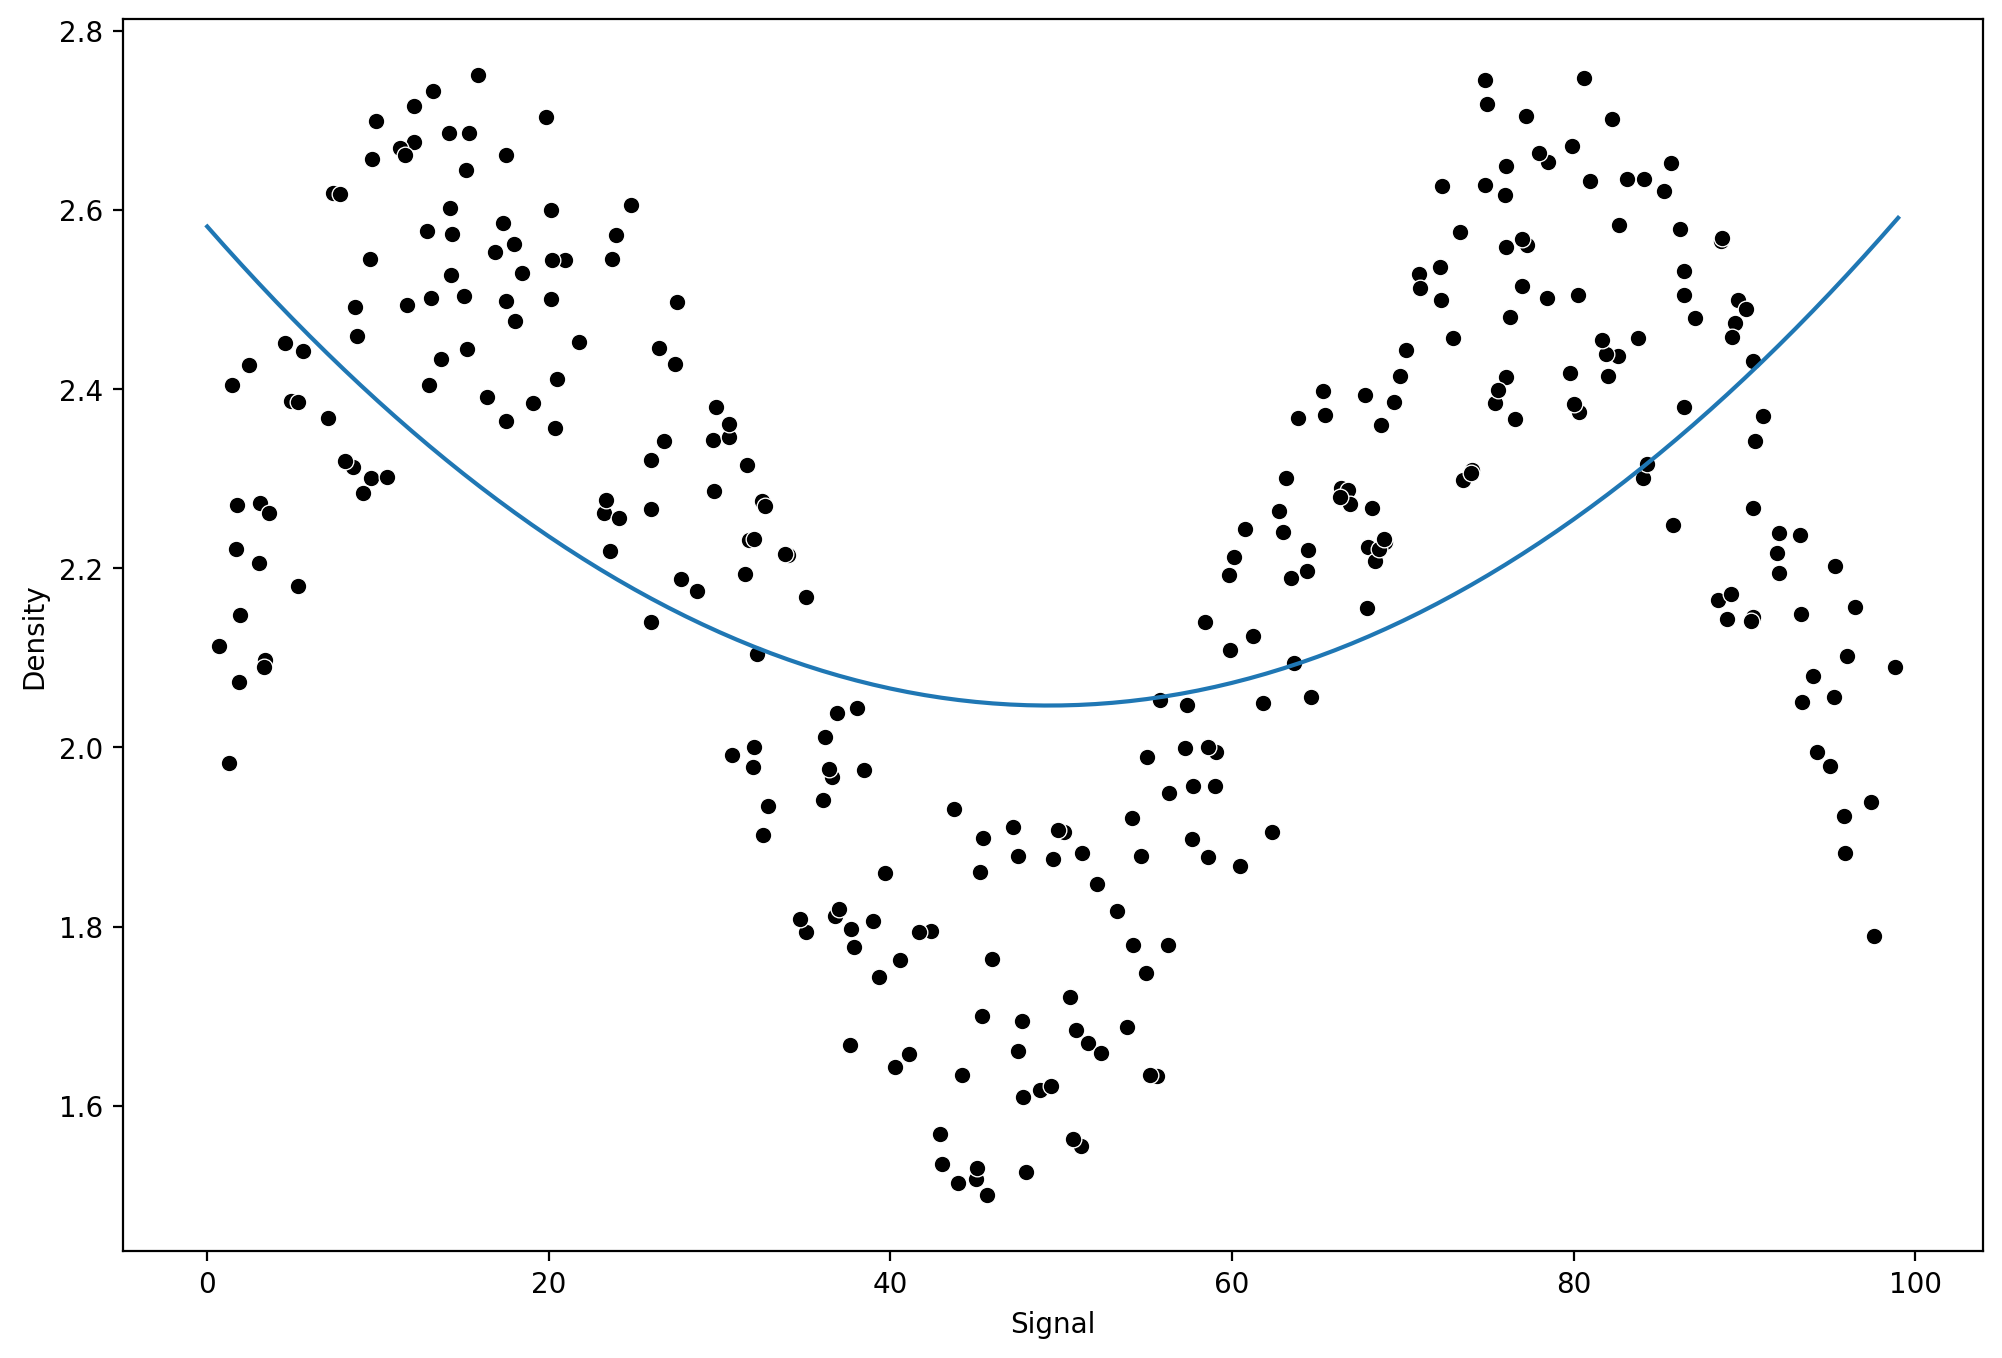

In [53]:
run_model(pipe,X_train,X_test,y_train,y_test)

In [56]:
# since polynomial regression first required to be converted to polynomial features
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

RMSE: 0.13807414122297
MAE: 0.11969104973085308


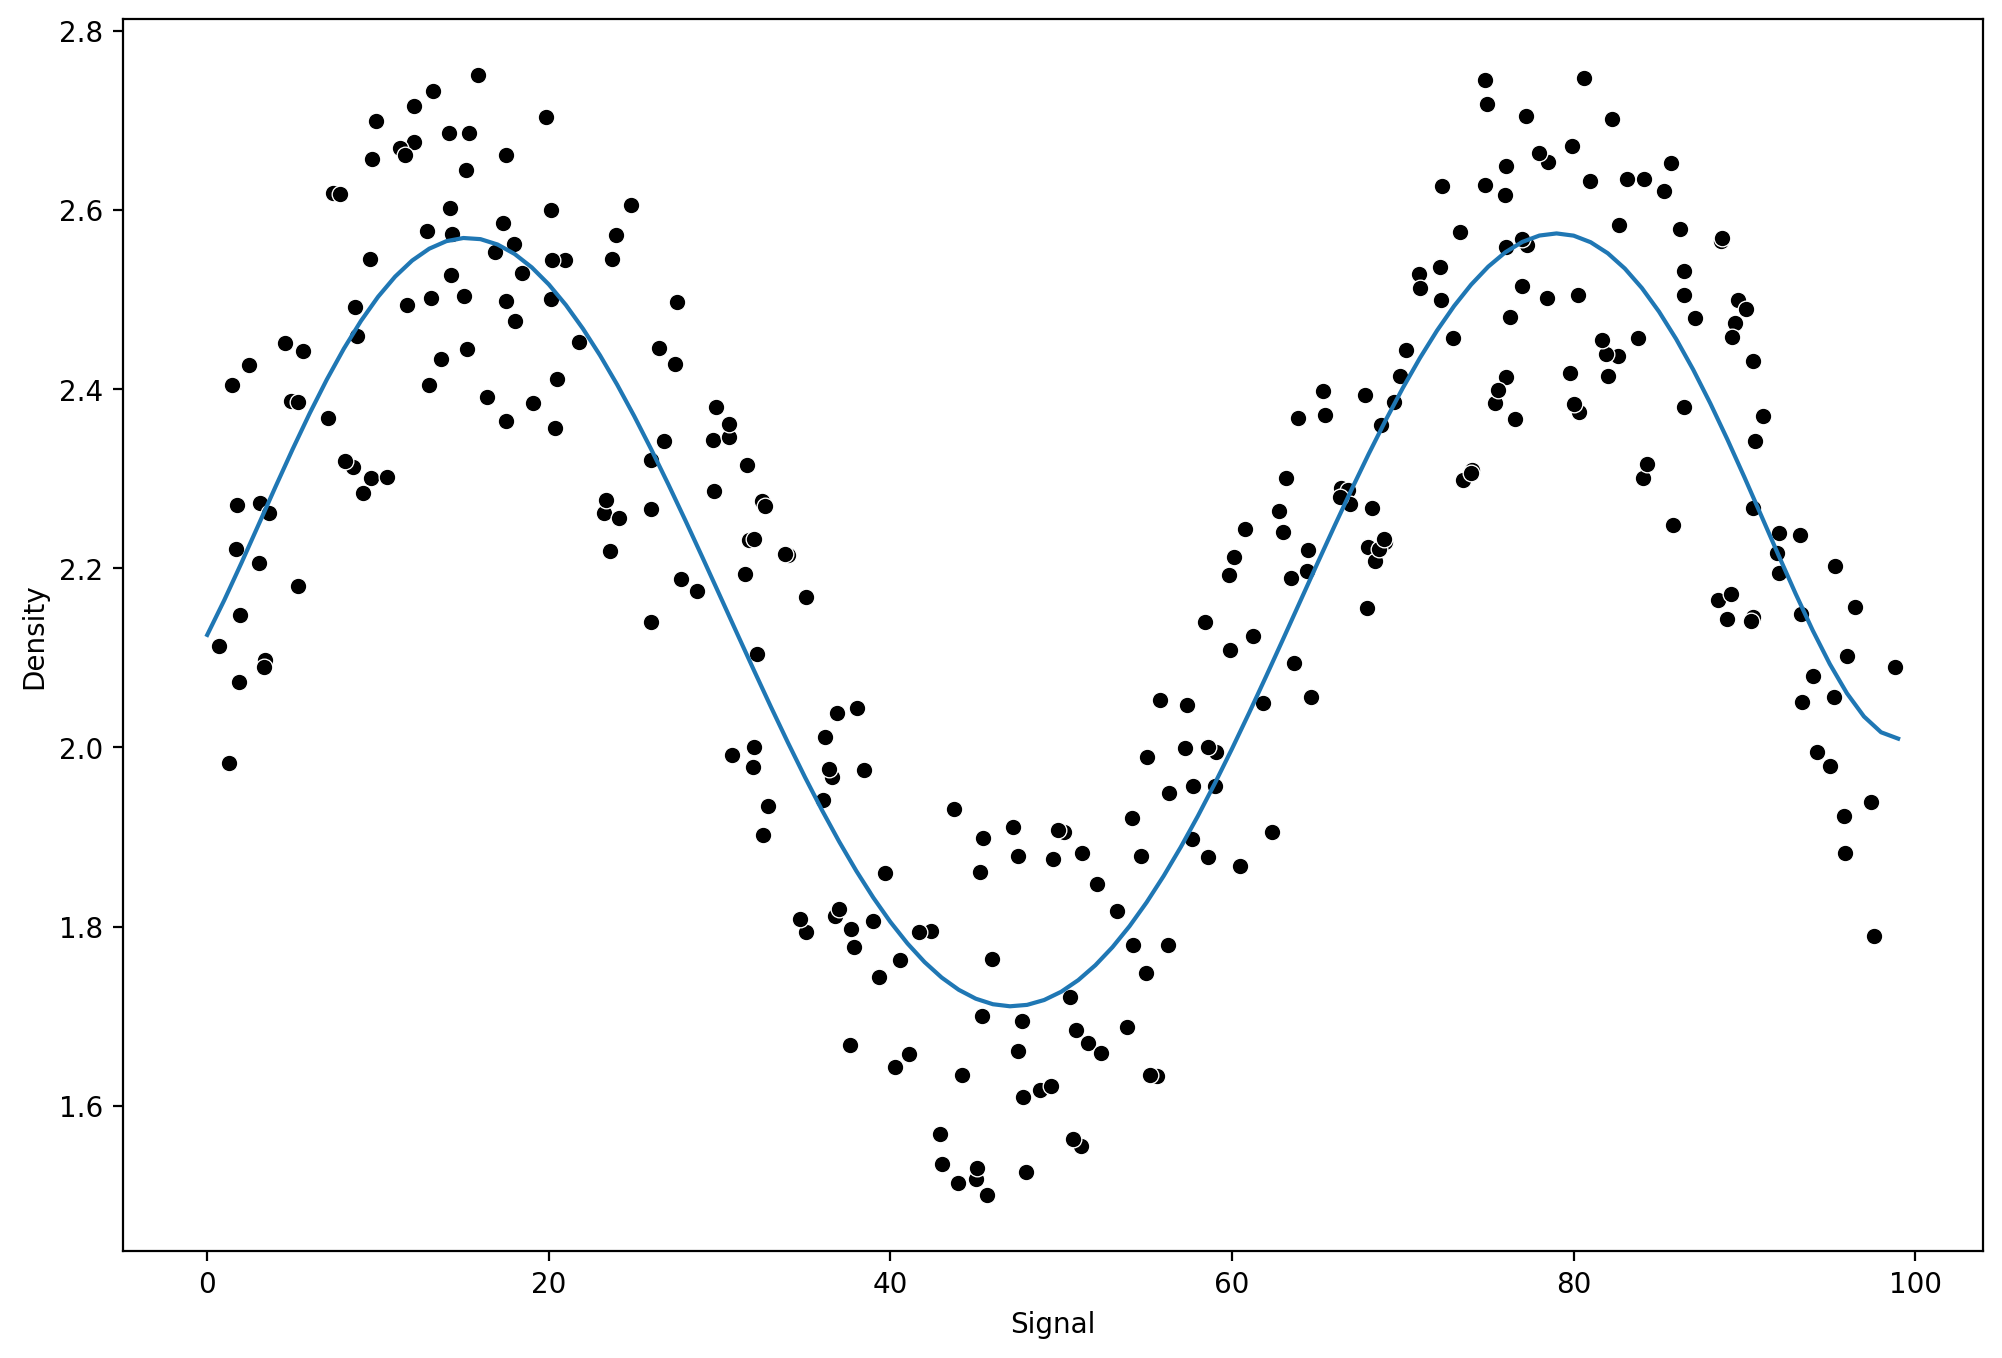

In [57]:
run_model(pipe,X_train,X_test,y_train,y_test)

In [61]:
# increasing degree means increasing variance 
# now what if we would like expand this signal range beyond 100, 
# this means that if we know our signal range and we are sure that our 
# signal range will be between 0,100 always.


# But we don't have data points for that and we don't even know what to expect
# hence in such case we go to more robust model

In [62]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378
RMSE: 0.13730685016923647
MAE: 0.12198383614100558
RMSE: 0.13277855732740926
MAE: 0.11635971693292672
RMSE: 0.1397499127378895
MAE: 0.1207030971917154


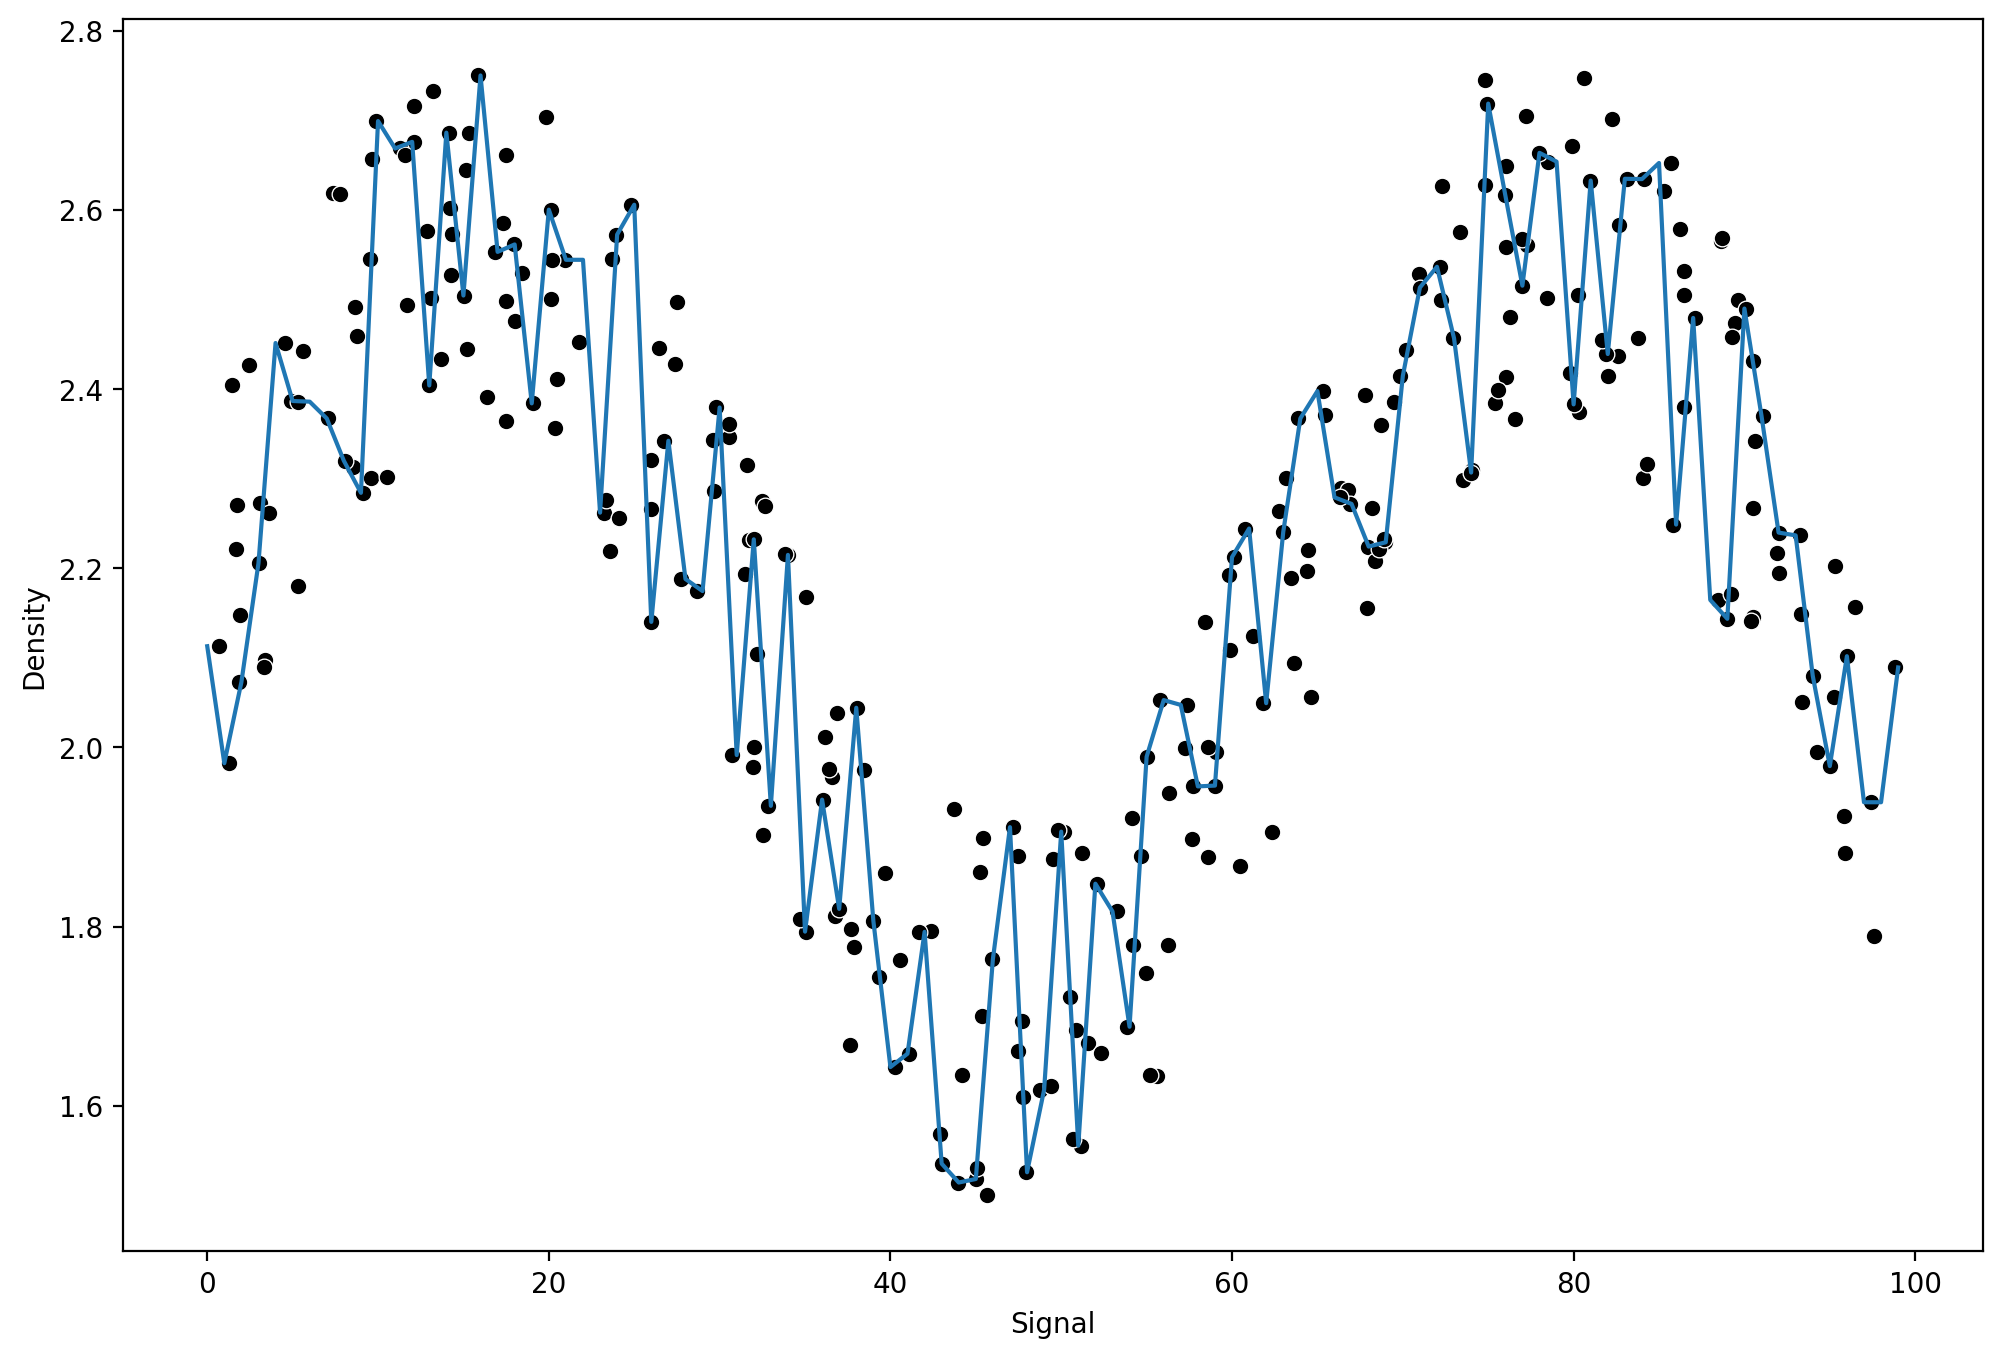

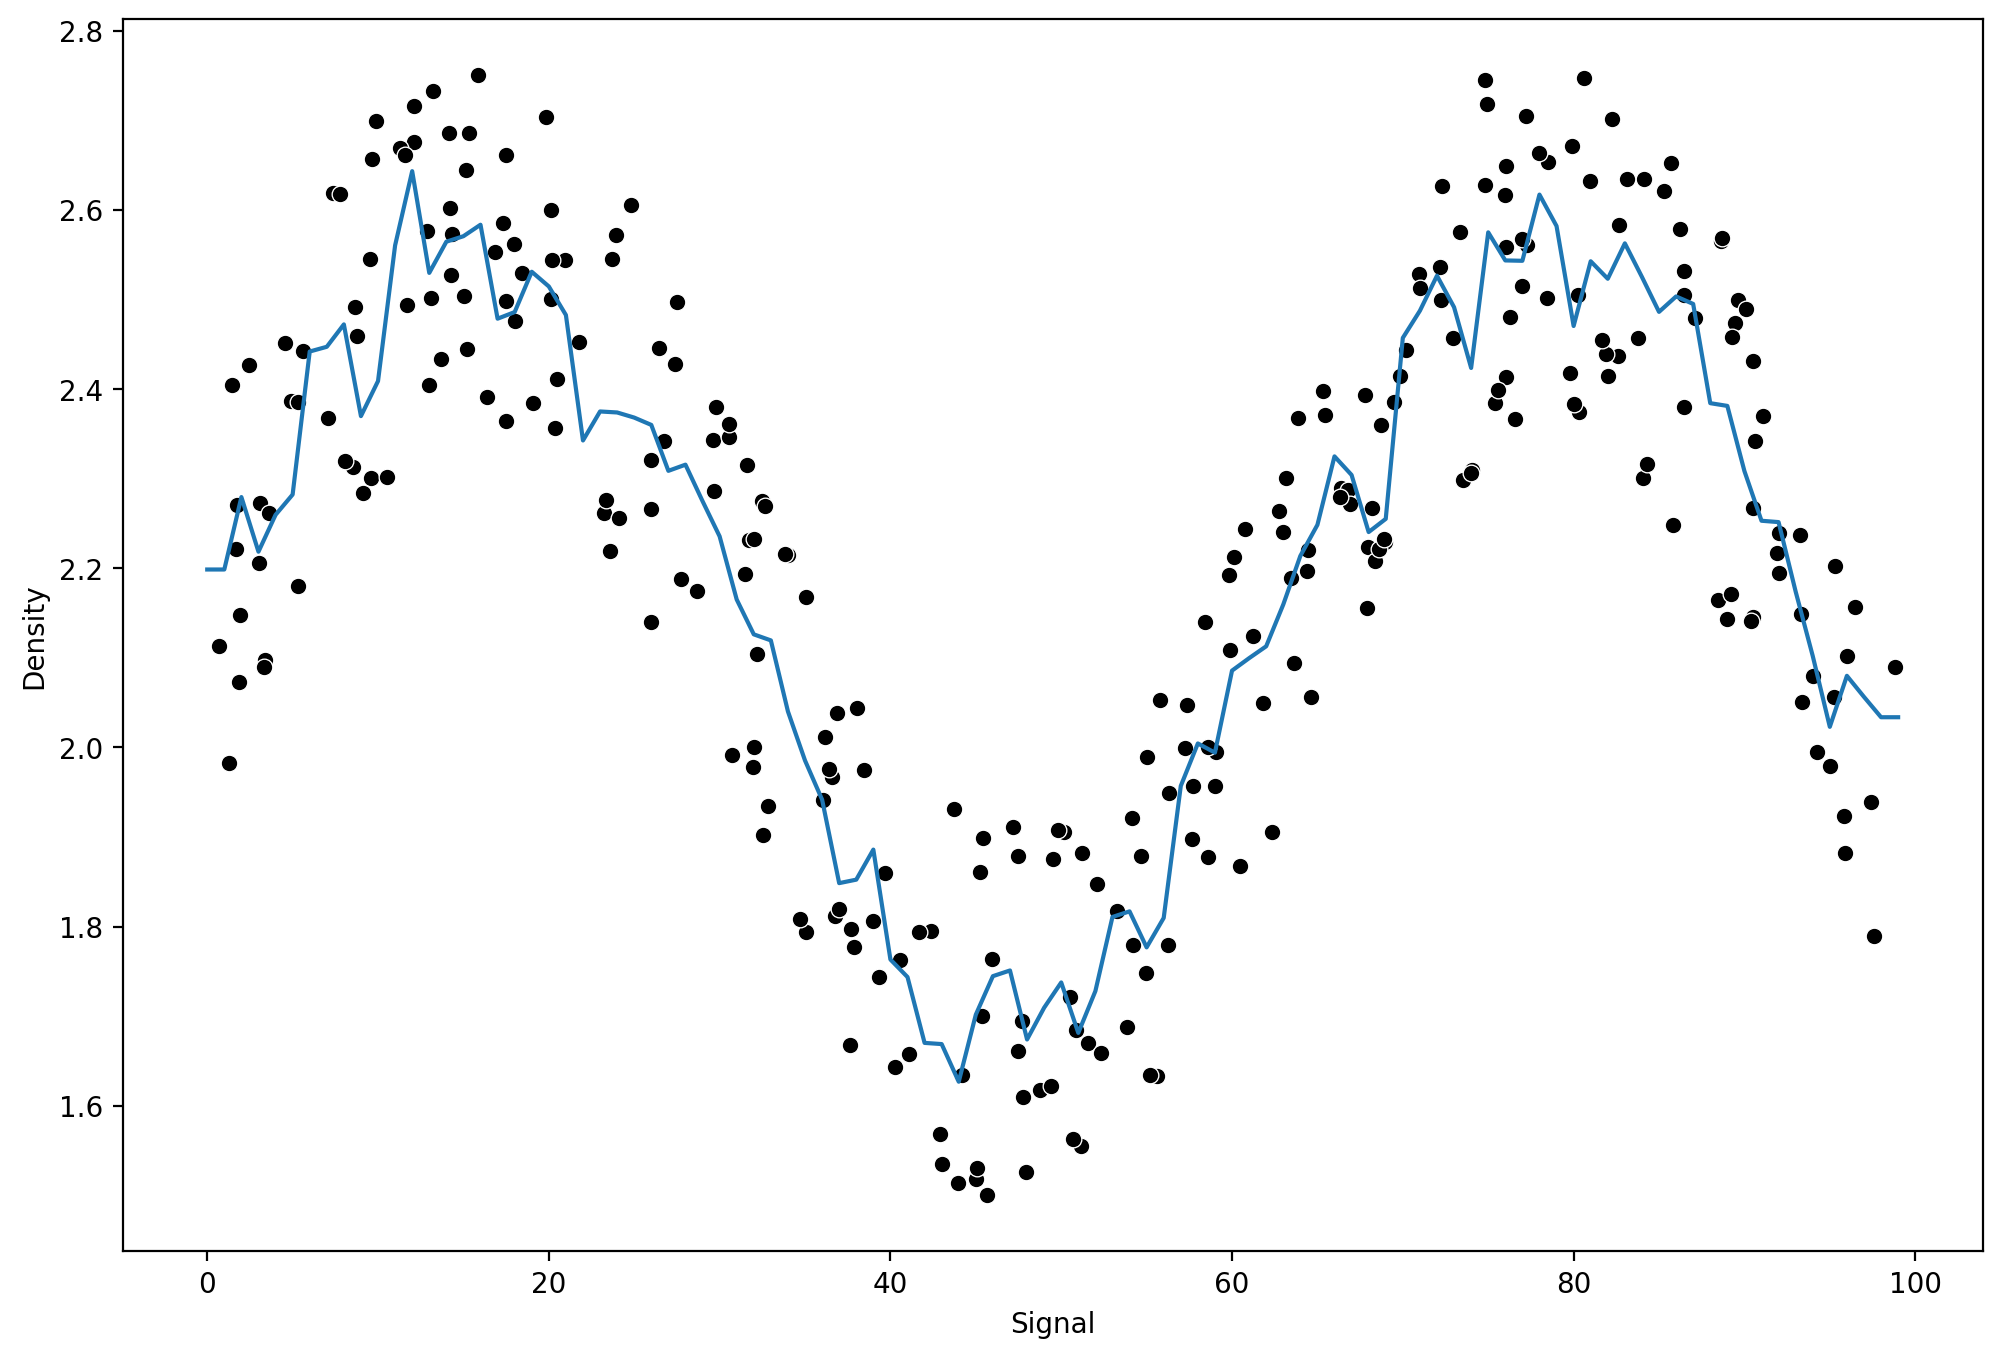

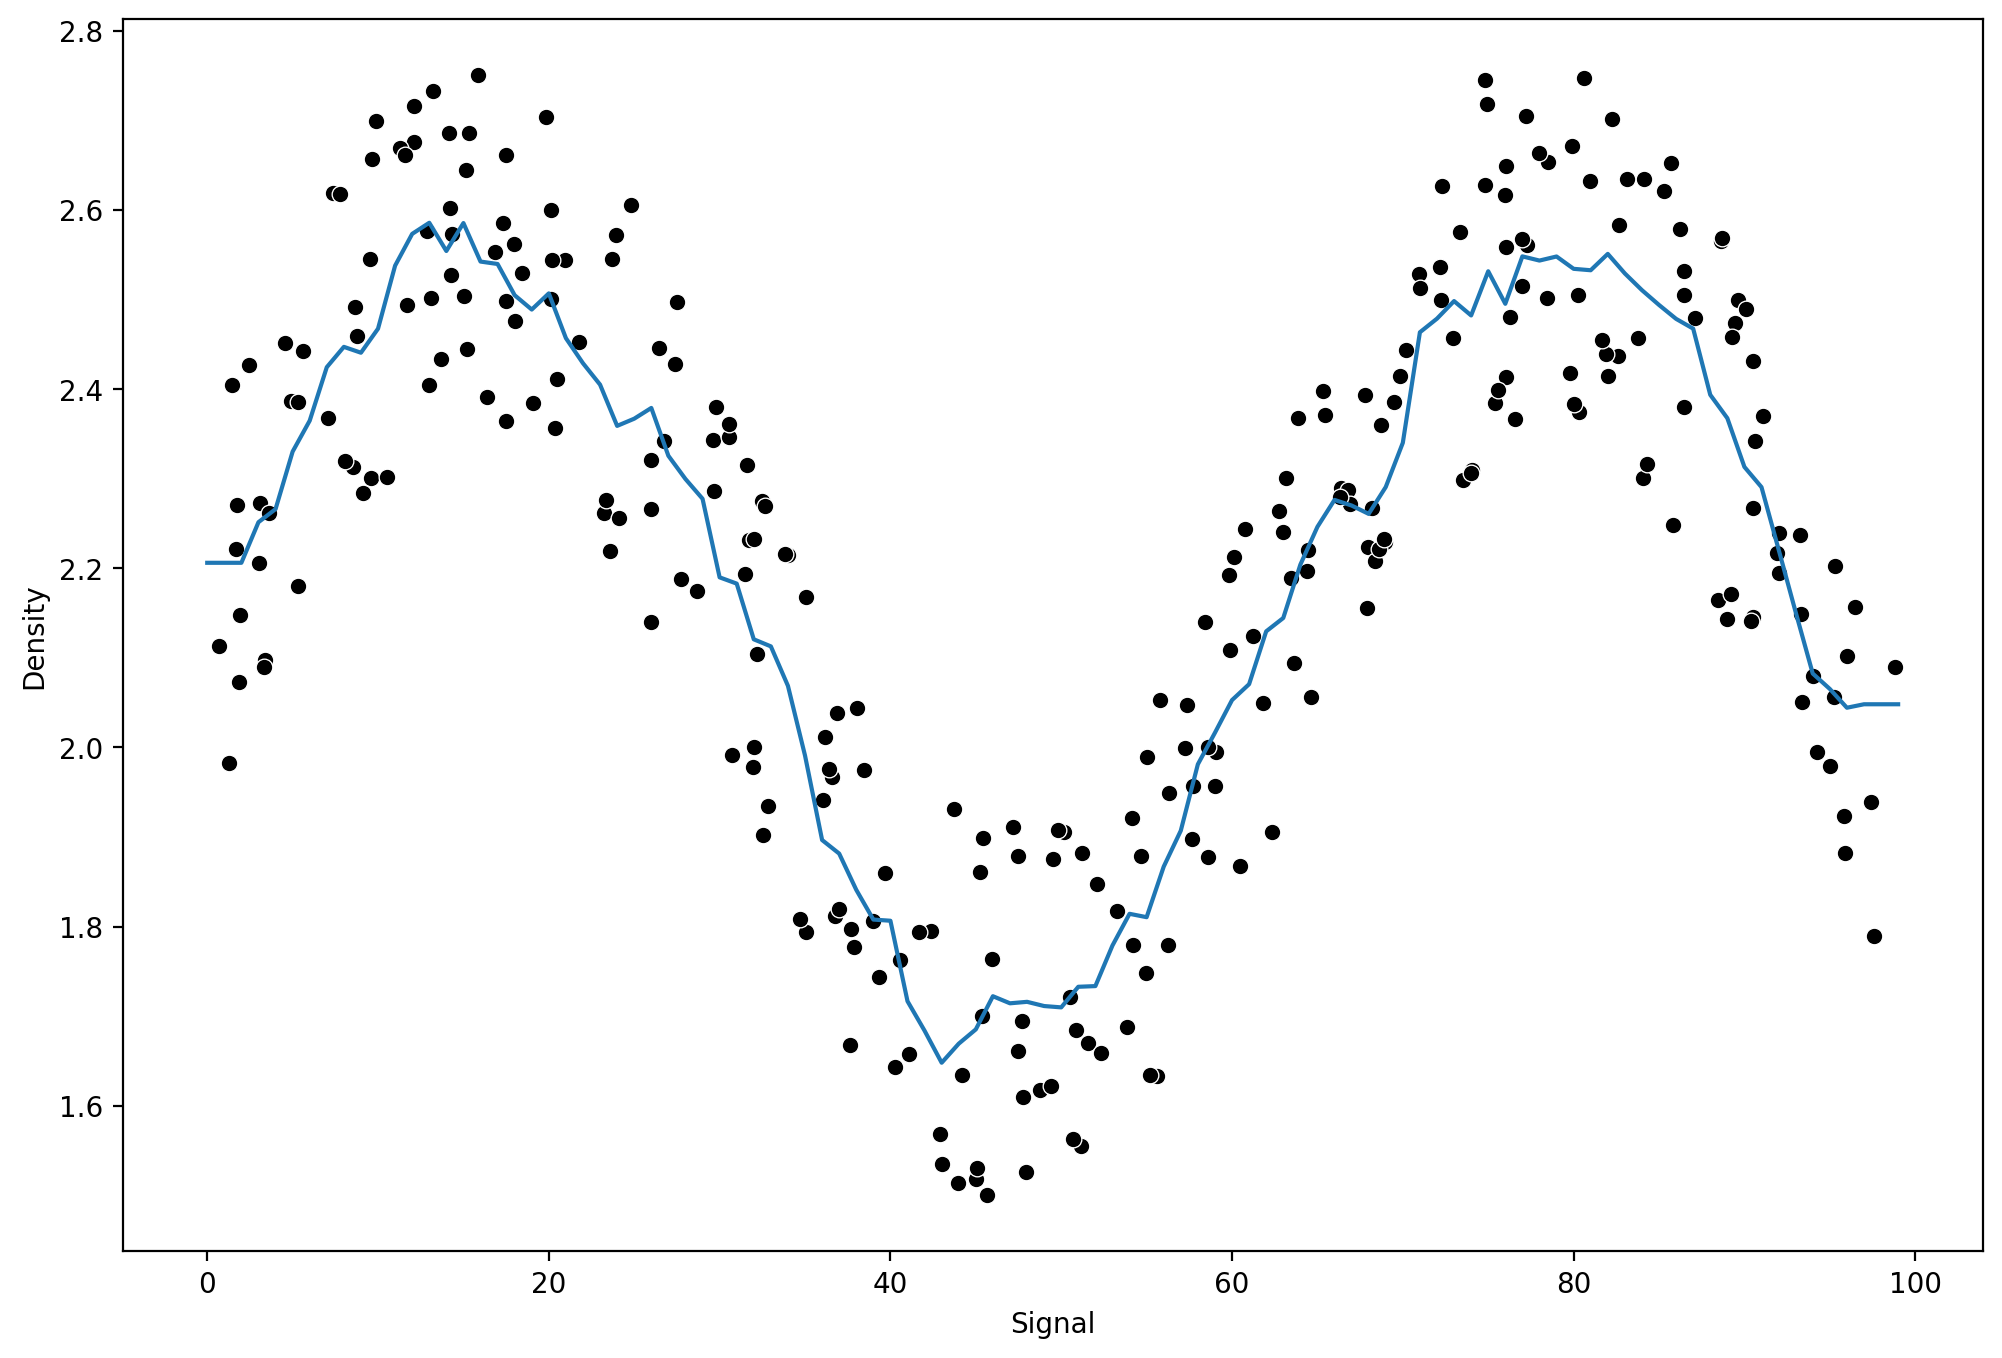

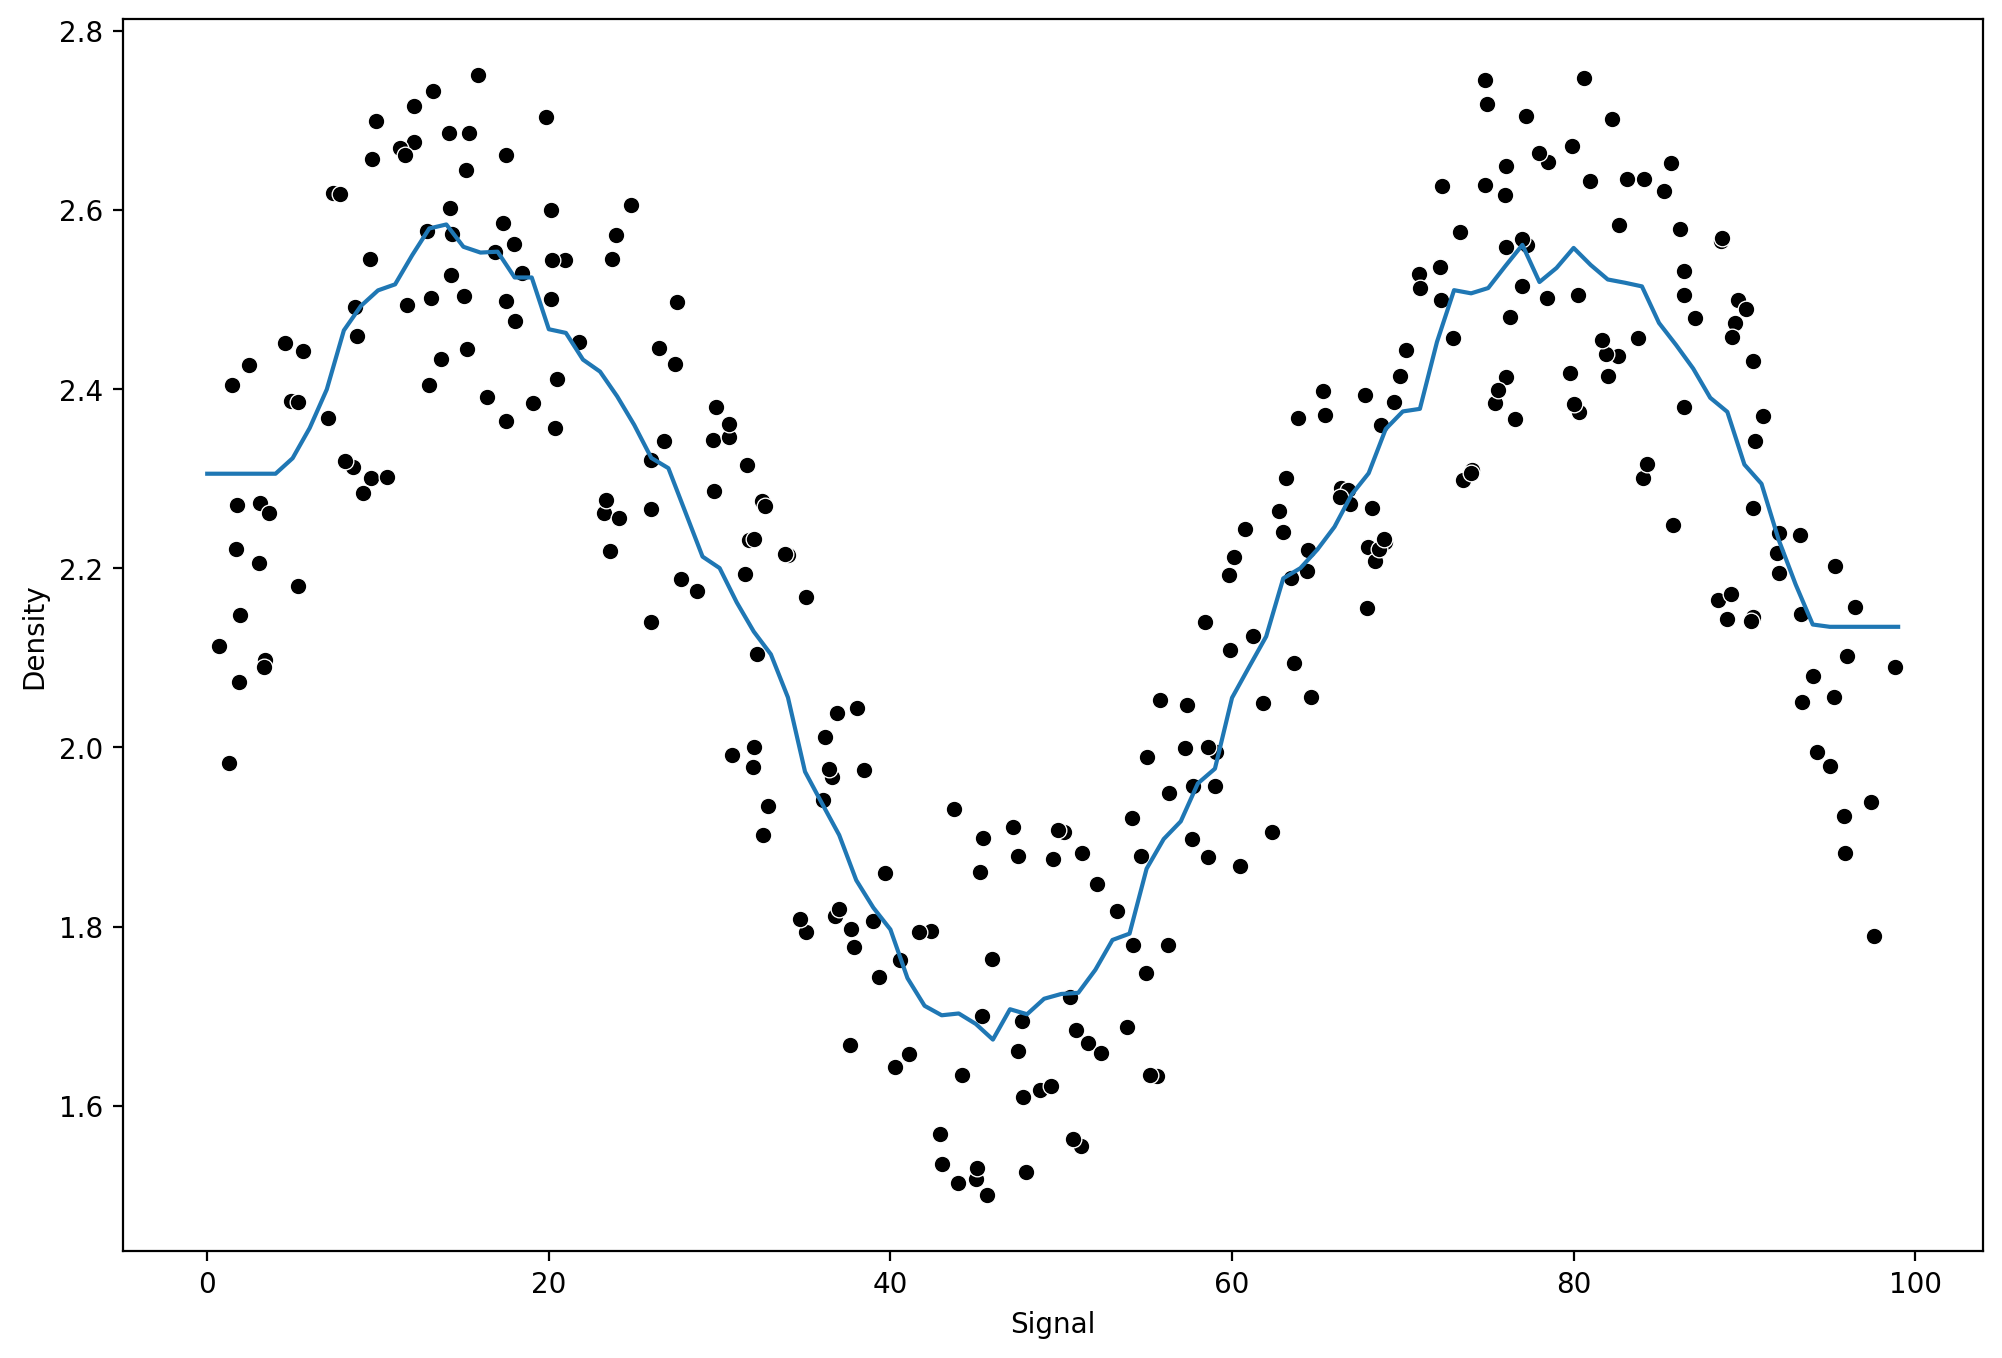

In [64]:
k_values = [1,5,10,20]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,X_test,y_train,y_test)
# increasing k value will result in increasing biasness of a model    

In [66]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


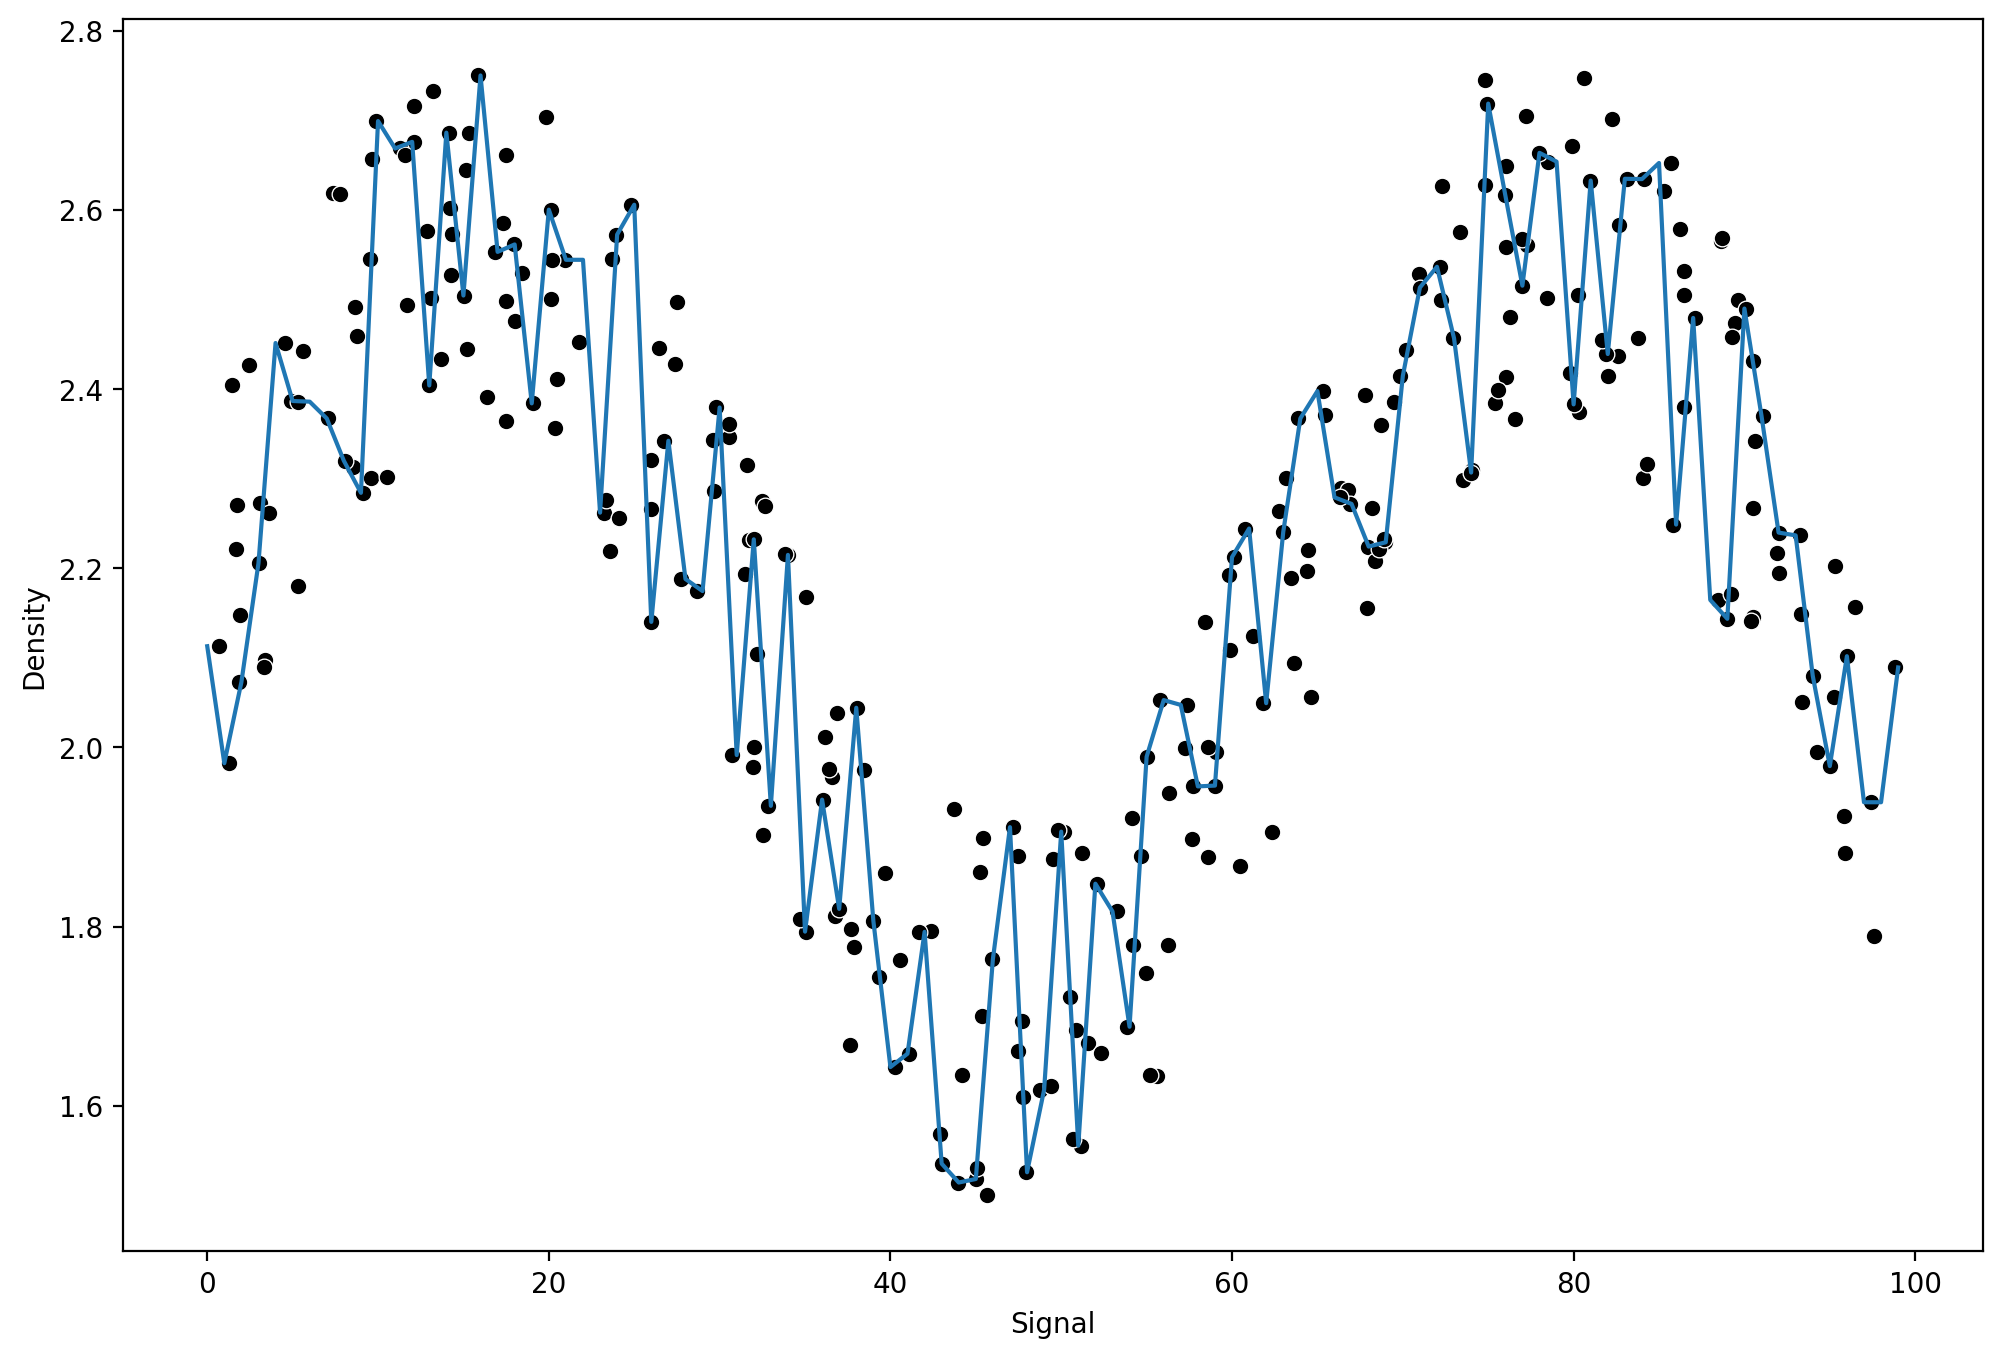

In [67]:
model = DecisionTreeRegressor()
run_model(model,X_train,X_test,y_train,y_test)

In [69]:
from sklearn.svm import SVR

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
svr = SVR()
param_grid={'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid)

RMSE: 0.12646999302046696
MAE: 0.10854210121348368


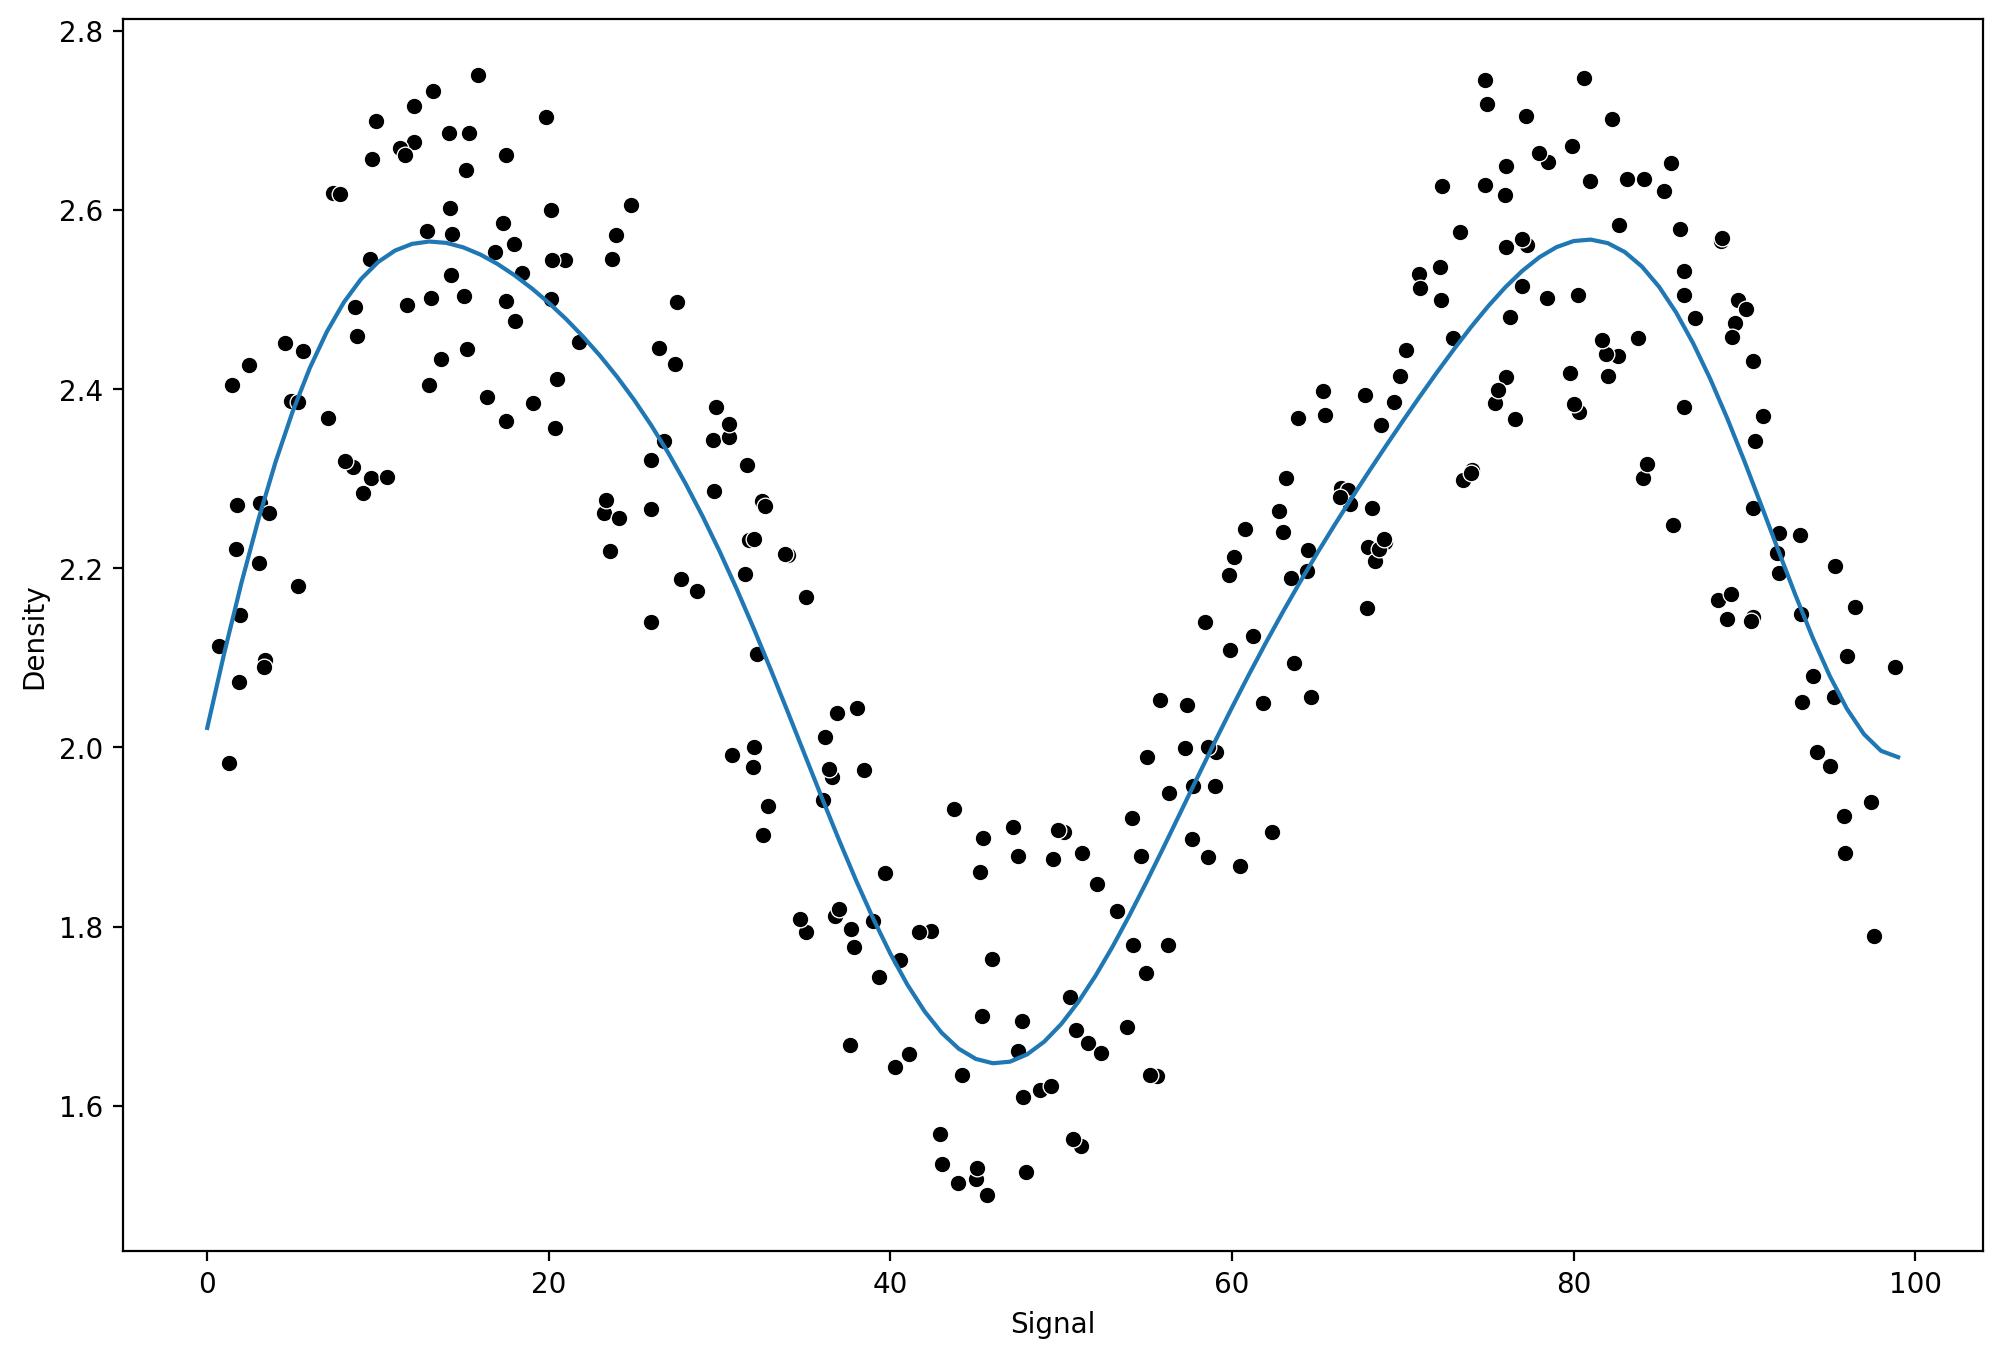

In [72]:
run_model(grid,X_train,X_test,y_train,y_test)

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE: 0.1351853908994352
MAE: 0.11504538625988388


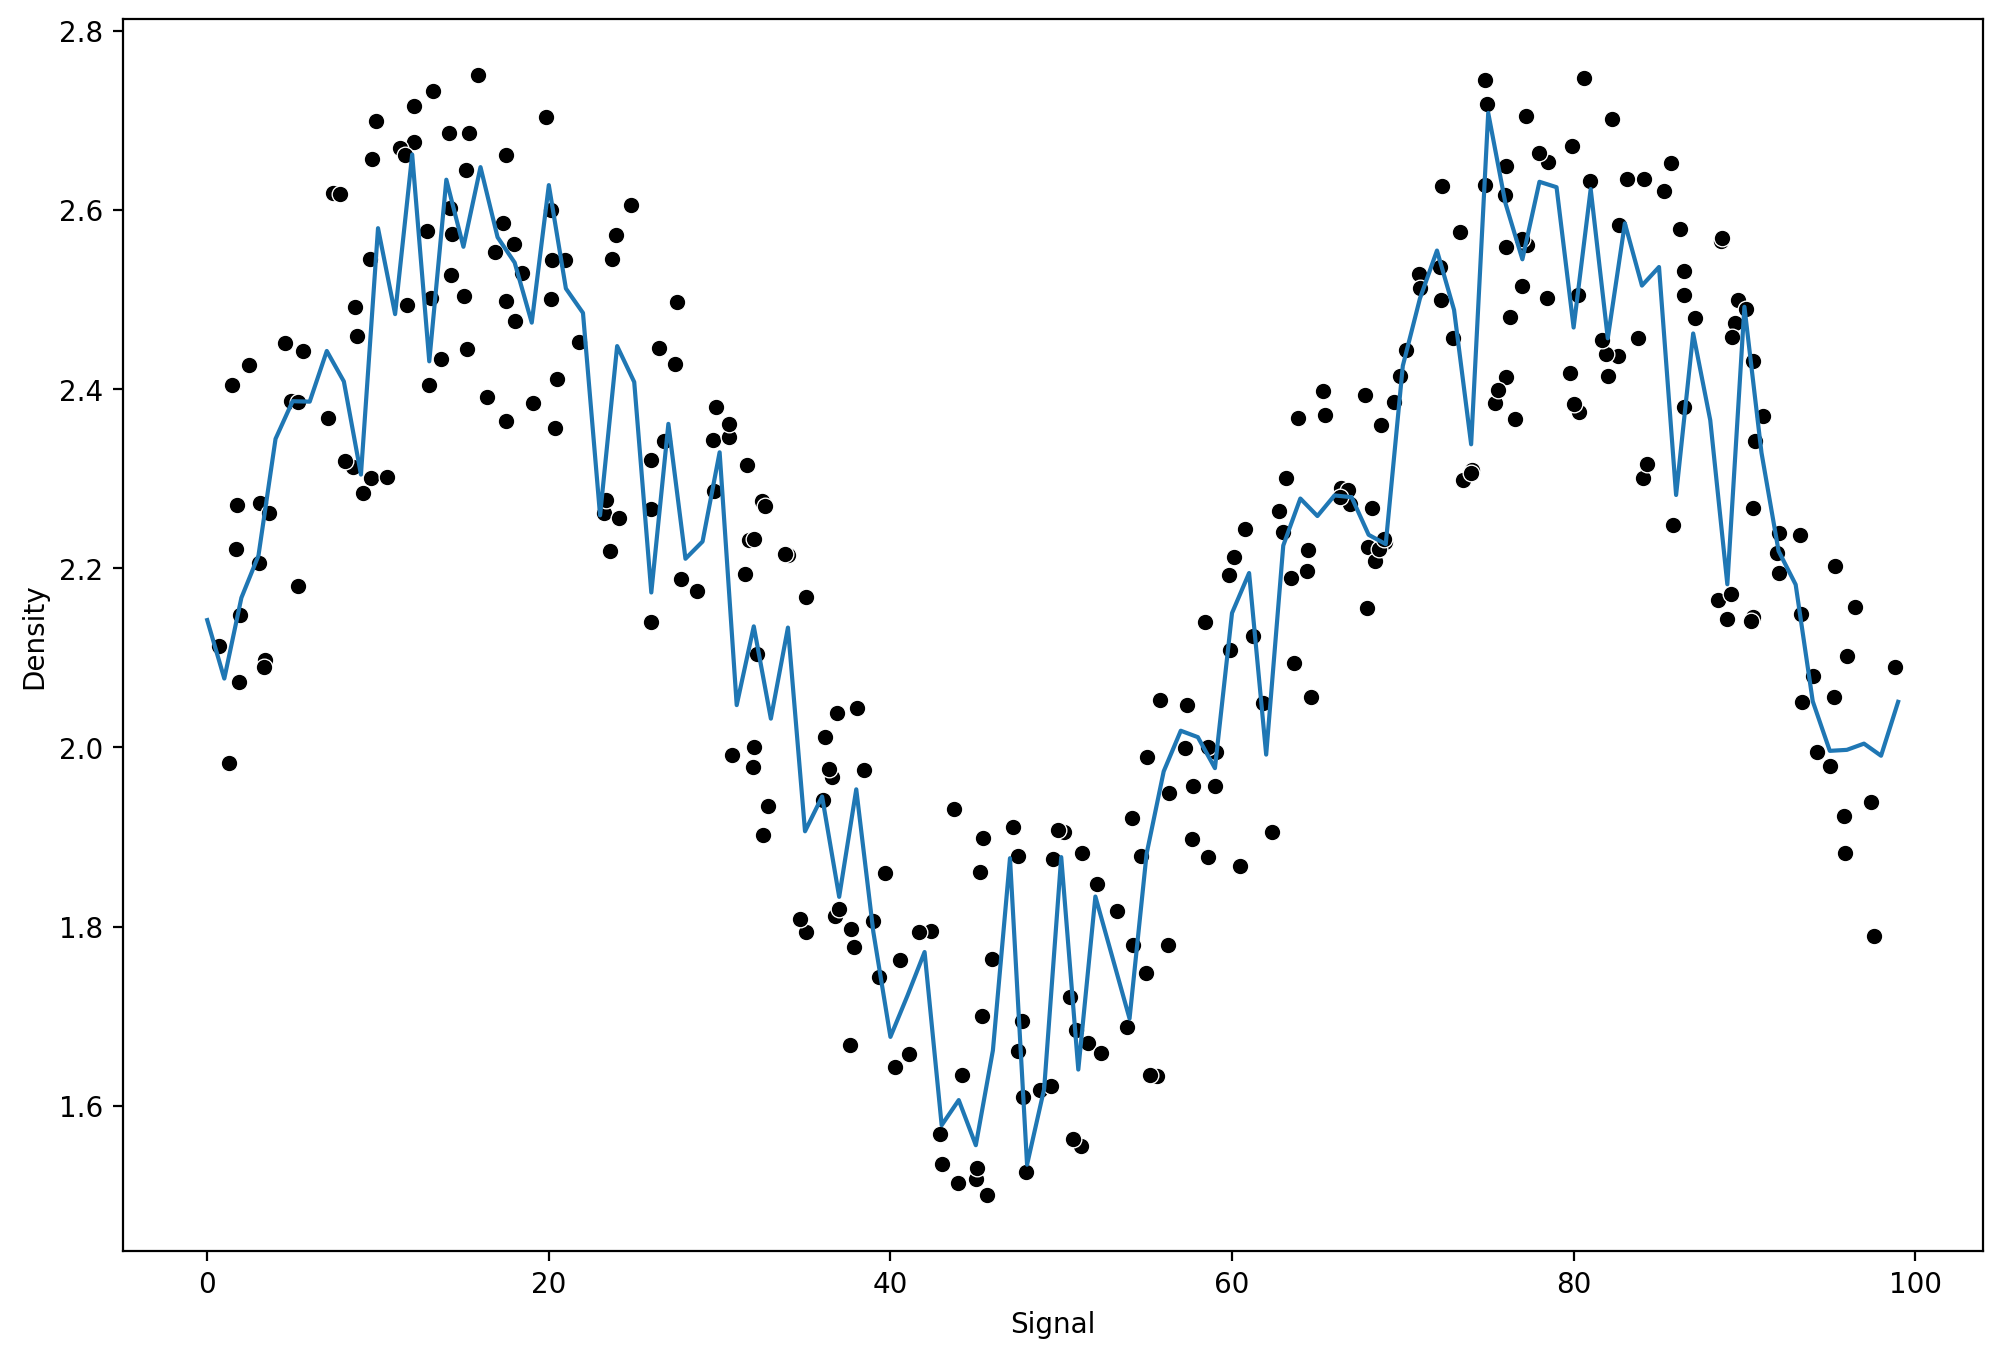

In [79]:
run_model(rfr,X_train,X_test,y_train,y_test)

In [80]:
# We notice similar behavior to that of decision tree here
# It is picking up a lot of noice but overall it is doing its best to
# fit to that general curvature.

In [82]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

RMSE: 0.13294148649584667
MAE: 0.11318284854800689


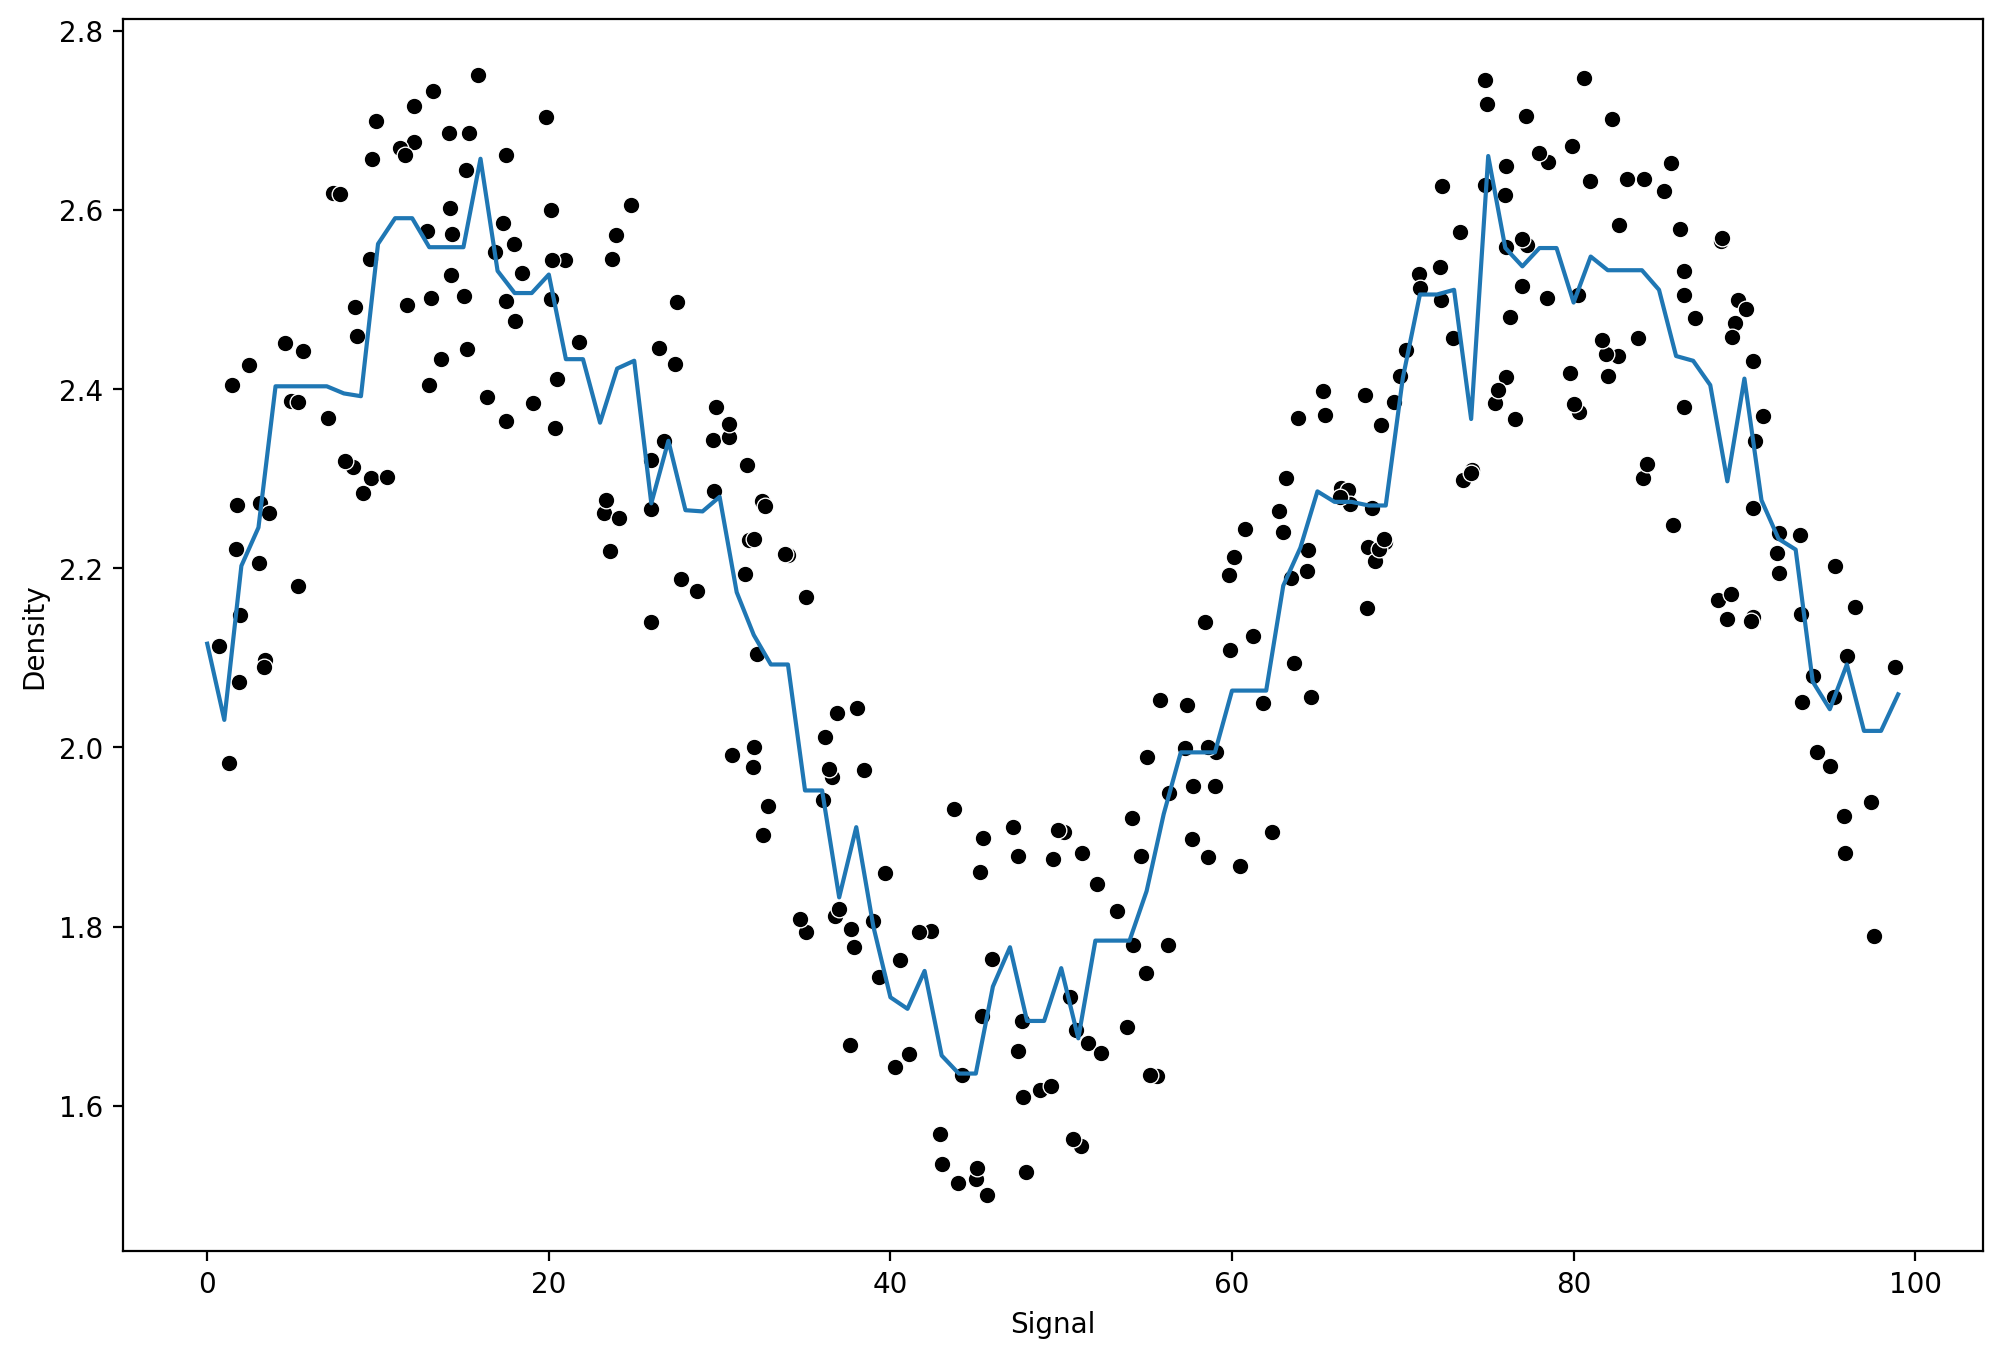

In [84]:
model = GradientBoostingRegressor()
run_model(model,X_train,X_test,y_train,y_test)

In [85]:
# overall it is perfroming well on the general shape and also do
# not picking up much noise in the data like RFRegressor

RMSE: 0.1386581541032534
MAE: 0.11791435937907702


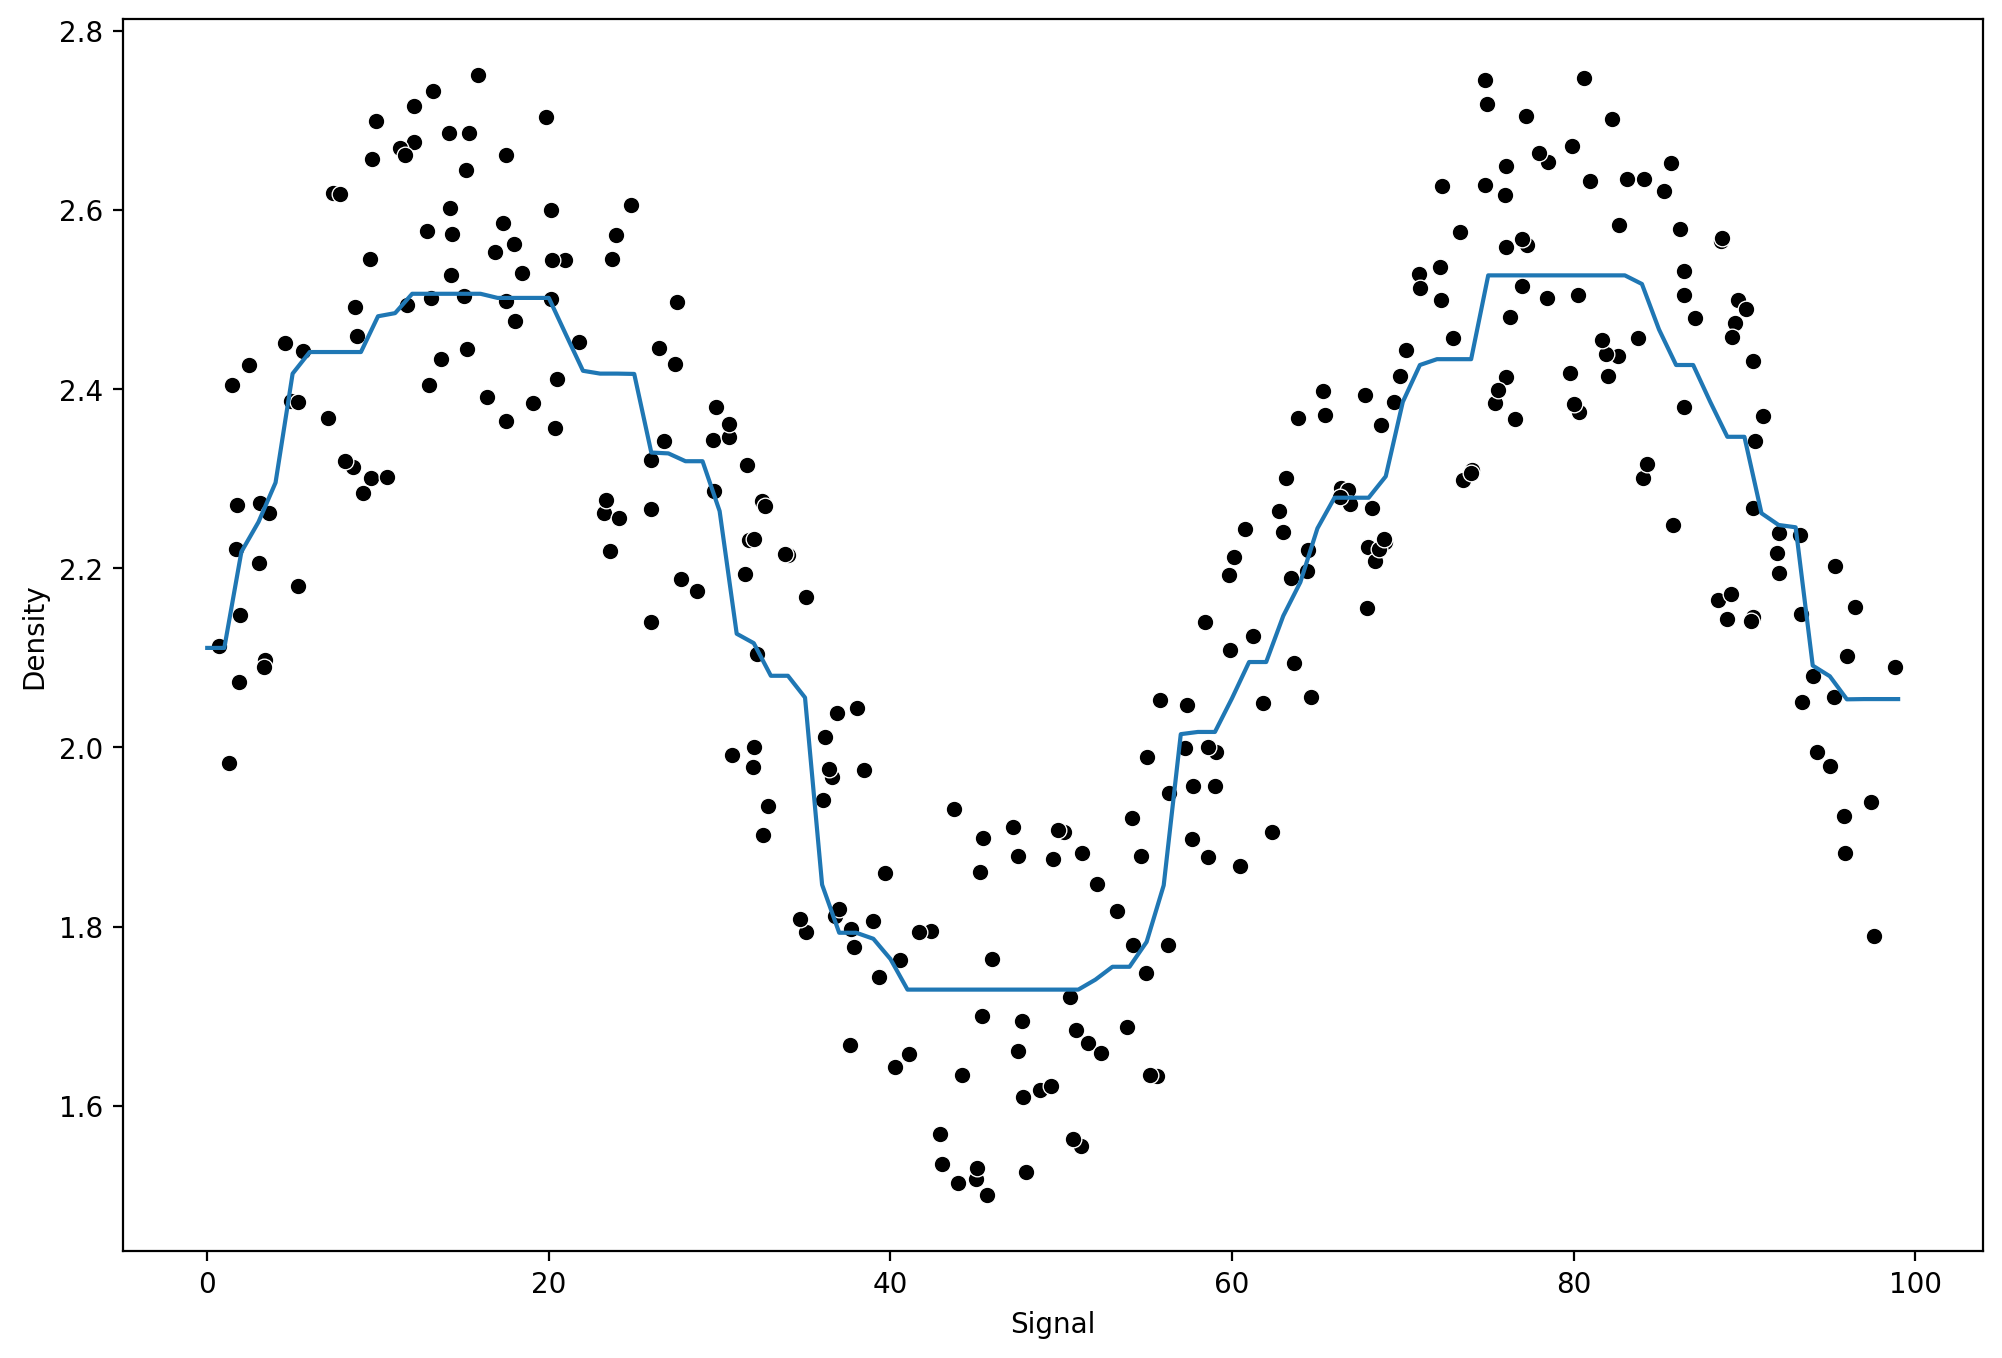

In [87]:
model = AdaBoostRegressor()
run_model(model,X_train,X_test,y_train,y_test)